# Mock interview Seite für Studenten

## Für dieses Interview wirst du mit dem folgenden Datensatz arbeiten. Schau ihn dir gerne in Ruhe an, um dich damit vertraut zu machen. 
- loans_modified.csv

 - Akzeptanz/Ablehnung (Scoring): Soll der Kreditantrag angenommen oder abgelehnt werden? (Dies wird oft durch ein Kredit-Scoring-Modell gelöst).

        - Kreditnehmer-Merkmale:

        - Demografische Daten (Alter, Wohnort, Familienstand).

        - Finanzielle Daten (Einkommen, Beschäftigungsstatus, Schulden, Vermögen).

        - Kredit-Historie (Anzahl der Kredite, bisherige Zahlungsmoral, Schufa-Score).
        
 - Risikopreisgestaltung: Welcher Zinssatz sollte dem Kunden angeboten werden, um das damit verbundene Ausfallrisiko angemessen zu bepreisen?

        - Kredithöhe (Loan Amount).

        - Laufzeit (Term).

        - Verwendungszweck (Purpose).

 - Kapitalbedarf (Regulatorik): Wie viel Eigenkapital muss die Bank gemäß regulatorischen Vorgaben (z.B. Basel III) für diesen Kredit zurücklegen?

        - Die wichtigste Information: Ist der Kredit ausgefallen (z.B. mehr als 90 Tage überfällig) oder wurde er ordnungsgemäß zurückgezahlt?



 ## Ziel des Interviews:
 - Erstelle ein Modell zur Analyse von Darlehen.

# Schritte zur Vorbereitung:
- 1. Mach dich mit den Daten vertraut.
- 2. Versuch, ein Modell zu erstellen.
- 3. Wir empfehlen dir, ein Notebook bereitzuhalten, um während des Interviews Notizen zu machen.

In [1]:
# ⚙️ Laden von CSV-Dateien in Colab/VSCode-Umgebung
# ============================================================
import pandas as pd
import os
import warnings
from tkinter import filedialog,Tk
import numpy as np
from typing import Dict, List, Callable, Union 
from pandas.api.types import is_numeric_dtype 

# Einstellungen
warnings.filterwarnings("ignore")

# Erkennung der Umgebung (Google Colab oder lokal)
try:
    from google.colab import files
    COLAB_ENV = True
except ImportError:
    COLAB_ENV = False

# ====== DATEI LADEN ======
print('*' * 10, 'DATEI LADEN', '*' * 10)

try:
    if COLAB_ENV:
        # Code für Google Colab
        print("Google Colab Umgebung erkannt. Bitte Datei hochladen.")
        uploaded = files.upload()
        file_name = list(uploaded.keys())[0]
        print(f"\nDie Datei '{file_name}' wurde erfolgreich hochgeladen und steht nun zur Verfügung.")
        df = pd.read_csv(file_name)
    else:
        # Code für lokale Umgebung mit Tkinter-Dateiauswahlfenster
        print("Lokale Umgebung erkannt. Es öffnet sich ein Dateiauswahlfenster.")
        
        # Erstellen eines Tkinter-Root-Fensters und Ausblenden
        root = Tk()
        root.withdraw() 
        
        # Öffnen des Dateidialogs und Abrufen des Pfades
        file_path = filedialog.askopenfilename(
            title="Wählen Sie Ihre CSV-Datei",
            filetypes=(("CSV-Dateien", "*.csv"), ("Alle Dateien", "*.*"))
        )
        
        if file_path:
            df = pd.read_csv(file_path)
            print(f"\nDie Datei '{file_path}' wurde erfolgreich geladen.")
        else:
            print("Keine Datei ausgewählt.")
            df = None
            
except Exception as e:
    print(f"Ein Fehler ist aufgetreten: {e}")
    df = None

********** DATEI LADEN **********
Lokale Umgebung erkannt. Es öffnet sich ein Dateiauswahlfenster.

Die Datei '/Users/cristallagus/Desktop/GitHub/Mock Interviwe 07.09.2025/loans_modified.csv' wurde erfolgreich geladen.


In [2]:
# ⚙️ DataFrames als CSV-Datei in df benennen
# ============================================================
import pandas as pd
print('*' * 10, 'DATEN LADEN', '*' * 10)

df = pd.read_csv('loans_modified.csv')

# Erfolgsnachweis: Ausgabe der Dateninformationen
print(f"Daten erfolgreich geladen! DataFrame-Größe: {df.shape}")
print("\nErste 5 Zeilen des geladenen DataFrames zur Überprüfung:")
print(df.head().to_string())

print('*' * 50)

********** DATEN LADEN **********
Daten erfolgreich geladen! DataFrame-Größe: (563, 13)

Erste 5 Zeilen des geladenen DataFrames zur Überprüfung:
    loan_id gender married dependents     education self_employed  applicant_income  coapplicant_income  loan_amount  loan_amount_term  credit_history property_area  loan_status
0  LP001003   Male     Yes          1      Graduate            No            4583.0              1508.0        128.0             360.0             1.0         Rural          0.0
1  LP001005   Male     Yes          0      Graduate           NaN            3000.0                 0.0         66.0             360.0             1.0         Urban          1.0
2  LP001006   Male     Yes          0  Not Graduate            No            2583.0              2358.0        120.0             360.0             1.0         Urban          1.0
3  LP001008   Male      No          0      Graduate            No            6000.0                 0.0        141.0             360.0        

In [3]:
# ⚙️ Analyse der Daten Type / Unique(count)/ Duplicate (count) / NaN / Ausreisser 
import pandas as pd
import numpy as np
import warnings
from typing import Dict, List, Callable, Union

# Zuweisung, wie vom Benutzer gewünscht
df_check = df

def generate_cleaning_muster(column: str, semantic_type: str) -> str:
    # Nur ein Platzhalter, da keine Code-Ausgabe gewünscht ist
    return ""

def analyze_semantic_type_v3(df_check: pd.DataFrame) -> pd.DataFrame:
    """
    Analysiert die semantischen Datentypen der Spalten in einem DataFrame.
    Die interne Logik zur Typ-Erkennung wurde von Ihrem bereitgestellten Muster übernommen.
    """
    SEMANTIC_HINTS_PRIORITY: Dict[str, Dict[str, Union[set, Callable]]] = {
        'ID': {
            'keywords': {'_id', 'session_id', 'trip_id', 'user_id', 'unique_id', 'kundennummer', 'bestellnr', 'order_id', 'artikelnummer'},
            'validation_func': lambda series: ((series.dropna().astype(str).apply(len) >= 5).any())
        },
        'Datum/Zeit': {
            'keywords': {'datum', 'zeit', 'date', 'time', 'start', 'end', 'birthdate', 'signup_date', 'check_in', 'check_out', 'departure', 'return', 'geburtstag', 'timestamp', 'creation_date', 'modified_date', 'erstellt'},
            'validation_func':lambda series: ((series.dropna().nunique() == 12 or series.dropna().nunique() == 31) or (series.dropna().apply(lambda x: isinstance(x, str)).all() and (pd.to_datetime(series.dropna(), errors='coerce').notna().all() or (series.dropna().astype(str).str.contains(r'[-_/]', na=False).any() and series.dropna().astype(str).str.contains(r'\d{4}', na=False).any()))))
        },
        'Geometrisch': {
            'keywords': {'geom', 'geometry', 'shape', 'wkt', 'geojson', 'coordinates', 'location_data'},
            'validation_func': lambda series: (series.dropna().astype(str).str.contains(r'^(POINT|LINESTRING|POLYGON|MULTIPOINT|MULTILINESTRING|MULTIPOLYGON)\s*\(', regex=True, na=False).any() or series.dropna().astype(str).str.contains(r'{"type":\s*"(Point|LineString|Polygon|MultiPoint|MultiLineString|MultiPolygon)"', regex=True, na=False).any())
        },
    }
    SEMANTIC_HINTS_TEXT: Dict[str, Dict[str, Union[set, Callable]]] = {
        'Text (Kategorisch)': {
            'keywords': {'city', 'country', 'länder', 'region', 'state', 'bundesland', 'zip', 'plz'},
            'validation_func': lambda series: series.dropna().nunique() >= 2 and (pd.api.types.is_string_dtype(series.dropna()) or isinstance(series.dropna().dtype, pd.CategoricalDtype))
        },
         'Text (Gender)': {
            'keywords': {'geschlecht', 'typ', 'category', 'art', 'gender'},
            'validation_func': lambda series: series.dropna().nunique() >= 2 and (pd.api.types.is_string_dtype(series.dropna()) or isinstance(series.dropna().dtype, pd.CategoricalDtype))
        },
        'Text (object)': {
            'keywords': {'airport', 'destination', 'origin', 'heimat', 'status'},
            'validation_func': lambda series: series.dropna().nunique() >= 2 and (pd.api.types.is_string_dtype(series.dropna()) or isinstance(series.dropna().dtype, pd.CategoricalDtype))
        },
        'Text (Freitext)': {
            'keywords': {'name', 'hotel', 'airline', 'beschreibung', 'kommentar', 'nachricht', 'adresse'},
            'validation_func': lambda series: pd.api.types.is_string_dtype(series.dropna()) or isinstance(series.dropna().dtype, pd.CategoricalDtype)
        },
    }
    SEMANTIC_HINTS_NUMERIC: Dict[str, Dict[str, Union[set, Callable]]] = {
        'Boolean(NaN)': {
            'keywords': {'is_invalid','missing', 'is_missing', 'has_value', 'exists', 'is_null', 'is_na', 'isnan', 'filled','is_outlier'},
            'validation_func': lambda series: (series.dropna().nunique() >= 1) and (pd.api.types.is_bool_dtype(series.dropna()) or set(series.dropna().astype(str).str.lower().str.strip().unique()).issubset({'true', 'false', '1', '0', 'ja', 'nein', 'yes', 'no', 't', 'f', 'wahr', 'falsch'}))
        },
        'Boolean': {
            'keywords': {'self_employed','is_weekend_trip', 'boolean', 'bool', 'booked', 'married', 'cancellation', 'children','discount', 'flight_booked', 'hotel_booked', 'return_flight_booked', 'is_cancelled'},
            'validation_func': lambda series: (series.dropna().nunique() == 2) and (pd.api.types.is_bool_dtype(series.dropna()) or set(series.dropna().astype(str).str.lower().str.strip().unique()).issubset({'true', 'false', '1', '0', 'ja', 'nein', 'yes', 'no', 't', 'f', 'wahr', 'falsch'}))
        },
        'Float (Geografisch)': {
            'keywords': {'lat', 'lon', 'latitude', 'longitude'},
            'validation_func': lambda series: pd.to_numeric(series.dropna(), errors='coerce').notna().all() and (pd.to_numeric(series.dropna(), errors='coerce').astype(str).str.count(r'\.').all() or pd.api.types.is_float_dtype(series.dropna()))
        },
        'Float (Prozentsatz)': {
            'keywords': {'percent', 'pct', 'rate', 'discount', '%'},
            'validation_func': lambda series: (series.dropna().nunique() > 2) and ((pd.to_numeric(series.dropna().astype(str).str.replace('%', ''), errors='coerce').dropna().between(0, 1).all() or pd.to_numeric(series.dropna().astype(str).str.replace('%', ''), errors='coerce').dropna().between(0, 100).all()) or (pd.to_numeric(series.dropna().astype(str).str.replace('%', ''), errors='coerce').notna().all() and series.dropna().astype(str).str.replace('%', '').str.replace(',', '.').str.match(r'^\d{1,3}(\.\d{1,3})?$').all()))
        },
        'Float (Waehrung)': {
            'keywords': {'preis', 'kosten', 'betrag', 'dollar', 'euro', 'yen', 'usd', 'eur', 'fare','chf', 'gbp', 'sek', 'jpy', '€', '£', '$'},
            'validation_func': lambda series: (pd.api.types.is_numeric_dtype(series.dropna()) or pd.to_numeric(series.dropna().str.replace(',', '.'), errors='coerce').notna().all()) and series.dropna().nunique() > 2
        },
        'Integer': {
            'keywords': {'_time_days','_duration_days','anzahl', 'menge', 'stueck', 'stk', 'count', 'qty', 'seats', 'rooms', 'nights', 'bags', 'clicks', 'nummer', 'nr', 'quantity', 'val', 'rating'},
            'validation_func': lambda series: (series.dropna().nunique() > 2) and pd.to_numeric(series.dropna(), errors='coerce').notna().all() and (pd.to_numeric(series.dropna(), errors='coerce').dropna().apply(lambda x: x.is_integer() if isinstance(x, float) else True).all())
        }
    }
    results: List[Dict[str, str]] = []
    hint_categories = [SEMANTIC_HINTS_PRIORITY, SEMANTIC_HINTS_TEXT, SEMANTIC_HINTS_NUMERIC]
    SEMANTIC_HINTS_NUMERIC_ORDERED: List[str] = ['Boolean(NaN)','Boolean', 'Float (Geografisch)', 'Float (Prozentsatz)', 'Float (Waehrung)', 'Integer']

    with warnings.catch_warnings():
        warnings.simplefilter("ignore", DeprecationWarning)
        warnings.simplefilter("ignore", UserWarning)

        # HIER: df muss df_check sein, um die Typen korrekt aus df_Cleaning zu ermitteln
        # Da die Funktion analyze_semantic_type_v3 df_check als Argument erwartet, sollte df_check verwendet werden.
        # Im Originalcode wird df verwendet, was nicht definiert ist, wenn df_check = df_Cleaning gesetzt wurde.
        # ICH gehe davon aus, dass der Benutzer hier df_check meint, da df_check an die Funktion übergeben wird.
        df_to_analyze = df_check # Verwende den übergebenen DataFrame

        for column in df_to_analyze.columns:
            original_dtype: str = str(df_to_analyze[column].dtype)
            semantic_type: str = original_dtype
            column_lower: str = column.lower()
            found_match: bool = False

            for hint_group in hint_categories:
                if found_match:
                    break
                if hint_group is SEMANTIC_HINTS_NUMERIC:
                    for sem_type in SEMANTIC_HINTS_NUMERIC_ORDERED:
                        hints = hint_group[sem_type]
                        name_match = any(keyword in column_lower for keyword in hints['keywords'])
                        content_valid = False
                        try:
                            content_valid = hints['validation_func'](df_to_analyze[column])
                        except Exception:
                            pass

                        if name_match and content_valid:
                            semantic_type = sem_type
                            found_match = True
                            break
                else:
                    for sem_type, hints in hint_group.items():
                        name_match = any(keyword in column_lower for keyword in hints['keywords'])
                        content_valid = False
                        try:
                            content_valid = hints['validation_func'](df_to_analyze[column])
                        except Exception:
                            pass

                        if name_match and content_valid:
                            semantic_type = sem_type
                            found_match = True
                            break

            results.append({
                'Spalte': column,
                'Semantischer Typ': semantic_type,
            })

    return pd.DataFrame(results)

# HAUPT-MUSTER FÜR KONSOLIDIERTE ANZEIGE (INKL. SEMANTIK, OHNE VORSCHLÄGE)
def muster_df_consolidated_view(df: pd.DataFrame) -> None:
    """
    Führt eine konsolidierte Datenqualitäts-Analyse durch, inklusive semantischer
    Typ-Erkennung, und gibt diese in einer einzigen Tabelle aus, OHNE
    Bereinigungsvorschläge.
    """
    # 1. Semantische Typ-Erkennung
    df_sem_types = analyze_semantic_type_v3(df)
    
    # Dictionary zur Konsolidierung ALLER Metriken pro Spalte
    consolidated_data: Dict[str, Dict[str, Union[str, float, int, None]]] = {}

    # Initialisierung und Basis-Metriken
    for col in df.columns:
        sem_type_row = df_sem_types[df_sem_types['Spalte'] == col].iloc[0] if col in df_sem_types['Spalte'].values else {'Semantischer Typ': str(df[col].dtype)}
        
        # Die Anzahl der duplizierten Einträge in der Spalte (df.shape[0] - df[col].nunique())
        duplicate_count = len(df) - df[col].nunique()
        
        consolidated_data[col] = {
            'Spalte': col,
            'Semantischer Typ': sem_type_row['Semantischer Typ'],
            'Ursprünglicher Datentyp': str(df[col].dtype),
            'Einzigartige Werte': df[col].nunique(),
            'Duplizierte Werte (Anzahl)': duplicate_count, # Hinzugefügt
            'Fehlende Werte (Anzahl)': df[col].isnull().sum(),
            'Fehlende Werte (%)': round(df[col].isnull().sum() / len(df) * 100, 2),
            
            # Statistische und ML-Metriken (Standardmäßig NaN)
            'Min': np.nan, '25% (Q1)': np.nan, 'Median': np.nan, '75% (Q3)': np.nan, 'Max': np.nan,
            'Skewness': np.nan,
            'Ausreißer (IQR-Anzahl)': 0,
        }
    # 2. Numerische Metriken und ML-Analyse
    numeric_relevant_types = {'Float (Geografisch)', 'Float (Prozentsatz)', 'Float (Waehrung)', 'Integer', 'Boolean', 'Boolean(NaN)'}
    
    for _, row in df_sem_types.iterrows():
        column = row['Spalte']
        semantic_type = row['Semantischer Typ']
        series = df[column]

        # Führe numerische Analysen nur für als numerisch erkannte Spalten durch
        if semantic_type in numeric_relevant_types or pd.api.types.is_numeric_dtype(series):
            try:
                # Verwenden von to_numeric mit errors='coerce' ist sicherer für gemischte Typen
                numeric_series = pd.to_numeric(series, errors='coerce').dropna()
                
                if not numeric_series.empty:
                    q1, median, q3 = numeric_series.quantile([0.25, 0.5, 0.75])
                    min_val = numeric_series.min()
                    max_val = numeric_series.max()

                    skewness = round(numeric_series.skew(), 2)
                    
                    Q1_o, Q3_o = numeric_series.quantile([0.25, 0.75])
                    IQR = Q3_o - Q1_o
                    lower_bound = Q1_o - 1.5 * IQR
                    upper_bound = Q3_o + 1.5 * IQR
                    outliers_count = ((numeric_series < lower_bound) | (numeric_series > upper_bound)).sum()
                    
                    consolidated_data[column].update({
                        'Min': round(min_val, 2),
                        '25% (Q1)': round(q1, 2),
                        'Median': round(median, 2),
                        '75% (Q3)': round(q3, 2),
                        'Max': round(max_val, 2),
                        'Skewness': skewness,
                        'Ausreißer (IQR-Anzahl)': int(outliers_count)
                    })
            except Exception:
                pass

    # 3. KONSOLIDIERTE AUSGABE
    
    final_df = pd.DataFrame(list(consolidated_data.values()))
    
    # Spaltenreihenfolge für die Lesbarkeit anpassen (Duplizierte Werte hinzugefügt)
    column_order = [
        'Spalte', 'Semantischer Typ', 'Ursprünglicher Datentyp', 'Einzigartige Werte',
        'Duplizierte Werte (Anzahl)', 
        'Fehlende Werte (Anzahl)', 'Fehlende Werte (%)', 
        'Min', '25% (Q1)', 'Median', '75% (Q3)', 'Max', 'Skewness',
        'Ausreißer (IQR-Anzahl)',
    ]
    final_df = final_df[[col for col in column_order if col in final_df.columns]]
    
    # NaN-Werte und 0-Werte für Nicht-Numerische durch "-" ersetzen
    for stat_col in ['Min', '25% (Q1)', 'Median', '75% (Q3)', 'Max', 'Skewness']:
        final_df[stat_col] = final_df[stat_col].apply(lambda x: '-' if pd.isna(x) else x)
        
    final_df['Ausreißer (IQR-Anzahl)'] = final_df.apply(
        lambda row: '-' if row['Semantischer Typ'] not in numeric_relevant_types and not pd.api.types.is_numeric_dtype(df[row['Spalte']]) else int(row['Ausreißer (IQR-Anzahl)']) if row['Ausreißer (IQR-Anzahl)'] is not None else 0,
        axis=1
    )
    # FINALE AUSGABE
    print('*' * 10, 'KONSOLIDIERTE DATENQUALITÄTS-ANALYSE', '*' * 10)
    print(' '*120 + (('-->'+'  ')*3))
    # HIER WIRD DIE GESAMTANZAHL DER DUPLIKATE IN ZEILEN ANGEZEIGT:
    print(f"Form (Zeilen, Spalten): {df.shape} | Duplikate (Zeilen): {df.duplicated().sum()}")
    print("-" * 50)
    # Ausgabe der finalen, konsolidierten Tabelle
    print(final_df.to_string())
    print(' '*120 + (('-->'+'  ')*3))
    print('*' * 50)

# HAUPTTEIL DES SKRIPTS
# df_check = df_Cleaning wird zu Beginn des Musters gesetzt.
if 'df_check' in locals() and isinstance(df_check, pd.DataFrame):
    muster_df_consolidated_view(df_check)
else:
    print("Bitte laden Sie Ihren Datensatz in einen Pandas DataFrame!")

********** KONSOLIDIERTE DATENQUALITÄTS-ANALYSE **********
                                                                                                                        -->  -->  -->  
Form (Zeilen, Spalten): (563, 13) | Duplikate (Zeilen): 25
--------------------------------------------------
                Spalte Semantischer Typ Ursprünglicher Datentyp  Einzigartige Werte  Duplizierte Werte (Anzahl)  Fehlende Werte (Anzahl)  Fehlende Werte (%)    Min 25% (Q1)  Median 75% (Q3)      Max Skewness Ausreißer (IQR-Anzahl)
0              loan_id               ID                  object                 512                          51                       29                5.15      -        -       -        -        -        -                      -
1               gender    Text (Gender)                  object                   2                         561                       29                5.15      -        -       -        -        -        -                      -
2 

In [4]:
# 👐 Unique zur reinen Anzeige der Unique-Werte (Inhalt) pro Spalte

df_check = df

print("UNIVERSAL: Inhalt der einzigartigen Werte pro Spalte")

for col in df_check.columns:
    series = df_check[col]
    
    if series.nunique(dropna=False) > 50:
        print(f"\nSpalte '{col}' (Datentyp: {series.dtype}): **Unique-Anzeige übersprungen (Kardinalität > 50)**")
        continue

    print("-" * 50)
    print(f"Spalte: '{col}' (Datentyp: {series.dtype})")
    unique_list = series.unique()
    
    # Verwendung von to_string(), um das gesamte Array übersichtlich auszugeben
    print(pd.Series(unique_list).to_string(header=False, index=False))

UNIVERSAL: Inhalt der einzigartigen Werte pro Spalte

Spalte 'loan_id' (Datentyp: object): **Unique-Anzeige übersprungen (Kardinalität > 50)**
--------------------------------------------------
Spalte: 'gender' (Datentyp: object)
  Male
Female
   NaN
--------------------------------------------------
Spalte: 'married' (Datentyp: object)
Yes
 No
NaN
--------------------------------------------------
Spalte: 'dependents' (Datentyp: object)
  1
  0
  2
 3+
NaN
--------------------------------------------------
Spalte: 'education' (Datentyp: object)
    Graduate
Not Graduate
         NaN
--------------------------------------------------
Spalte: 'self_employed' (Datentyp: object)
 No
NaN
Yes

Spalte 'applicant_income' (Datentyp: float64): **Unique-Anzeige übersprungen (Kardinalität > 50)**

Spalte 'coapplicant_income' (Datentyp: float64): **Unique-Anzeige übersprungen (Kardinalität > 50)**

Spalte 'loan_amount' (Datentyp: float64): **Unique-Anzeige übersprungen (Kardinalität > 50)**
------

# Datenbereinigung und Vorbereitung 
- Die historischen Darlehensdaten müssen gesäubert, fehlende Werte imputiert und Features (Merkmale) erstellt werden.

In [5]:
# ⚙️ Datenbereinigung
# ============================================================
df_clear = df.copy()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)

# Spalten mit fehlenden Werten identifizieren
cols_with_missing = df_clear.columns[df_clear.isnull().any()].tolist()

# Durch die Spalten iterieren und fehlende Werte behandeln
for col in cols_with_missing:
    # Spalte hinzufügen, um anzuzeigen, ob der Wert ursprünglich NaN war
    df_clear[f'is_na_{col}'] = df_clear[col].isnull()
    
    # Fehlende Werte füllen
    if df_clear[col].dtype == 'object':
        # Kategoriale Spalten mit dem Modus füllen
        mode_val = df_clear[col].mode()[0]
        df_clear[col].fillna(mode_val, inplace=True)
    else:
        # Numerische Spalten mit dem Median füllen (robuster gegenüber Ausreißern)
        median_val = df_clear[col].median()
        df_clear[col].fillna(median_val, inplace=True)

# Duplikate entfernen
df_clear.drop_duplicates(inplace=True)

# Datentypen korrigieren
df_clear['dependents'] = df_clear['dependents'].str.replace('3+', '3').astype(int)

# Konvertiere 'gender', 'married', 'education', 'self_employed', 'property_area' in kategoriale Typen
for col in ['gender', 'married', 'education', 'self_employed', 'property_area']:
    df_clear[col] = df_clear[col].astype('category')
    
print('Datenbereinigung abgeschlossen.')
print(f'Form des bereinigten DataFrames: {df_clear.shape}')
print('Fehlende Werte nach der Bereinigung:')
print(df_clear.isnull().sum())
print('Info zum bereinigten DataFrame:')
df_clear.info()


Datenbereinigung abgeschlossen.
Form des bereinigten DataFrames: (538, 26)
Fehlende Werte nach der Bereinigung:
loan_id                     0
gender                      0
married                     0
dependents                  0
education                   0
self_employed               0
applicant_income            0
coapplicant_income          0
loan_amount                 0
loan_amount_term            0
credit_history              0
property_area               0
loan_status                 0
is_na_loan_id               0
is_na_gender                0
is_na_married               0
is_na_dependents            0
is_na_education             0
is_na_self_employed         0
is_na_applicant_income      0
is_na_coapplicant_income    0
is_na_loan_amount           0
is_na_loan_amount_term      0
is_na_credit_history        0
is_na_property_area         0
is_na_loan_status           0
dtype: int64
Info zum bereinigten DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 538 entries, 0 to 

1. Datenbereinigung (df_clear)
Das Ziel dieser Phase war es, einen sauberen und nutzbaren Datensatz für die weitere Analyse zu erstellen.

Behandlung fehlender Werte:

Fehlende Werte in numerischen Spalten (z.B. loan_amount) wurden durch den Median ersetzt. Der Median ist robuster gegenüber Ausreißern als der Mittelwert.
Fehlende Werte in kategorialen Spalten (z.B. gender, married) wurden durch den Modus (den am häufigsten vorkommenden Wert) ersetzt.
Für jede Spalte, in der Werte ersetzt wurden, wurde eine neue is_na_**-Spalte** (z.B. is_na_loan_amount) hinzugefügt. Diese Boolean(NaN)-Spalte dient als "Gedächtnis" und ermöglicht es dem Modell, zu lernen, ob das ursprüngliche Fehlen eines Wertes eine eigene Bedeutung hat.
Entfernung von Duplikaten: Doppelte Zeilen wurden aus dem Datensatz entfernt, um die Datenqualität zu verbessern und Verzerrungen im Modell zu vermeiden.

Korrektur von Datentypen: Die Spalte dependents wurde von einem Text- in einen numerischen Typ umgewandelt, um sie für mathematische Berechnungen und das Modelltraining nutzbar zu machen. Andere textbasierte Spalten mit einer begrenzten Anzahl von Werten (gender, married, etc.) wurden in den Datentyp category umgewandelt, um die Effizienz der Datenverarbeitung zu verbessern.

# Explorative Datenanalyse (EDA): 
- Verstehen, welche Merkmale die Ausfallwahrscheinlichkeit am

In [6]:
df.head()


,loan_id,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,0.0
1,LP001005,Male,Yes,0,Graduate,NaN,3000.0,0.0,66.0,360.0,1.0,Urban,1.0
2,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,1.0
3,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,1.0
4,LP001011,Male,Yes,2,Graduate,Yes,5417.0,4196.0,267.0,360.0,1.0,Urban,1.0


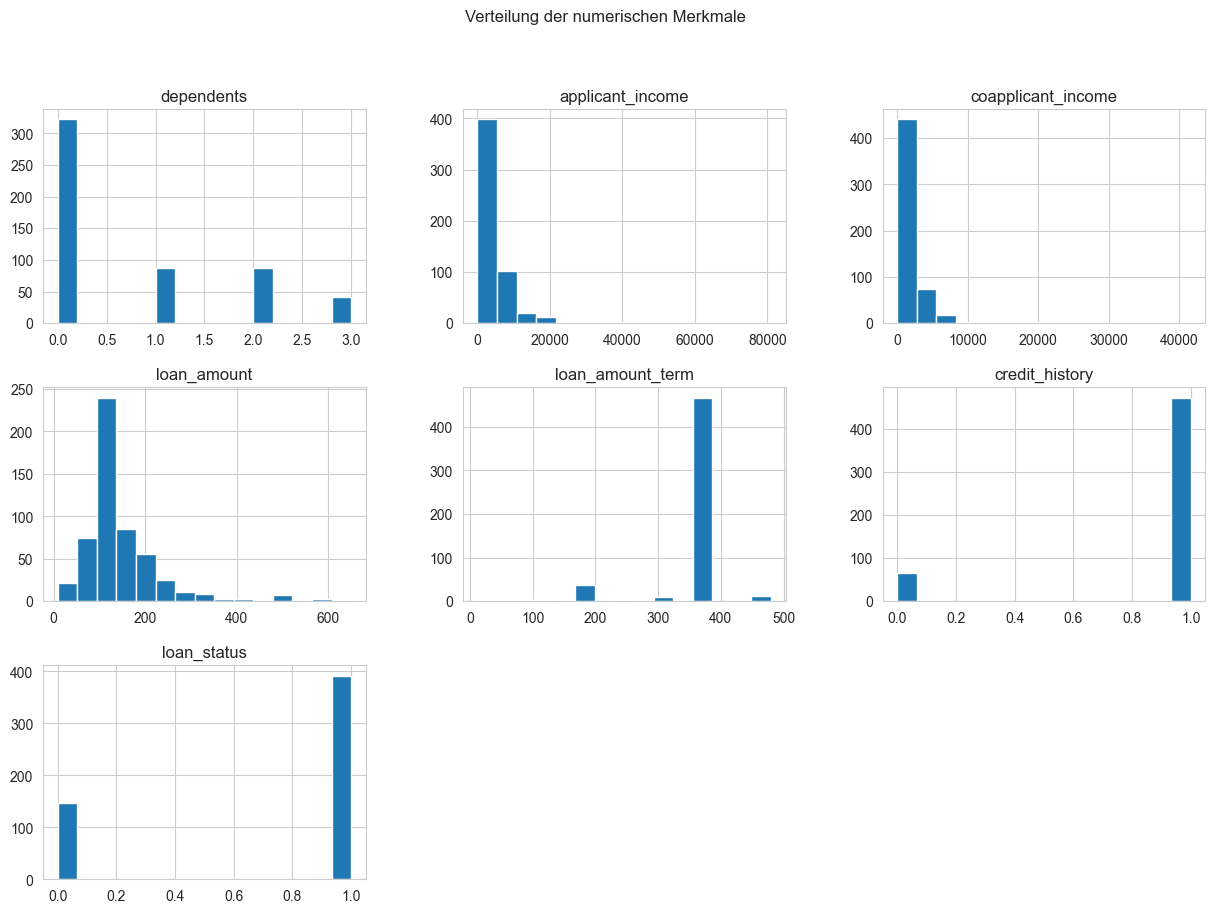

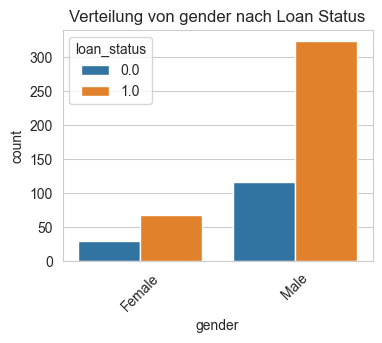

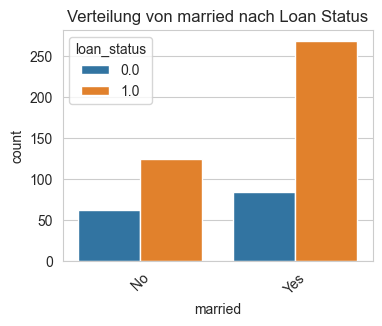

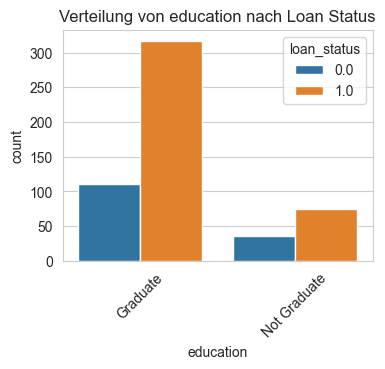

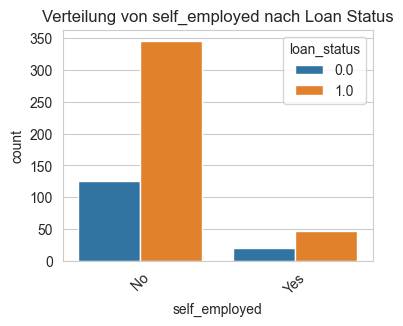

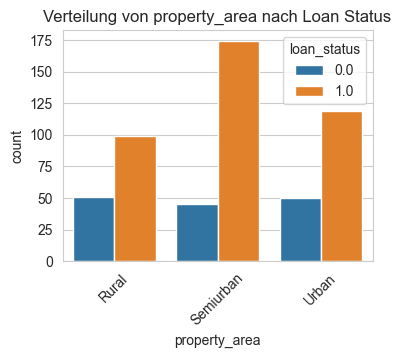

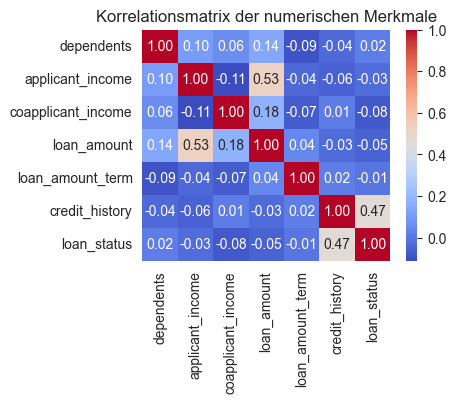

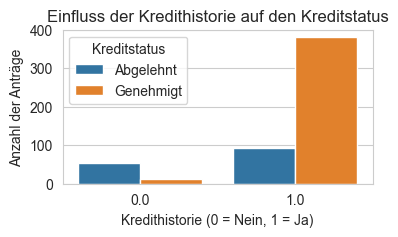

In [7]:
# ⚙️ Explorative Datenanalyse
# ============================================================
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set plotting style
sns.set_style('whitegrid')

# Verteilung der numerischen Merkmale
numerical_cols = df_clear.select_dtypes(include=np.number).columns.tolist()
df_clear[numerical_cols].hist(bins=15, figsize=(15, 10), layout=(-1, 3))
plt.suptitle('Verteilung der numerischen Merkmale')
plt.show()

# Verteilung der kategorialen Merkmale
categorical_cols = df_clear.select_dtypes(include=['category']).columns.tolist()
for col in categorical_cols:
    plt.figure(figsize=(4, 3))
    sns.countplot(x=col, data=df_clear, hue='loan_status')
    plt.title(f'Verteilung von {col} nach Loan Status')
    plt.xticks(rotation=45)
    plt.show()

# Korrelationsmatrix
plt.figure(figsize=(4, 3))
sns.heatmap(df_clear[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korrelationsmatrix der numerischen Merkmale')
plt.show()

# Diesen Code in Zelle [6] hinzufügen, um den fehlenden Plot zu erzeugen
plt.figure(figsize=(4, 2))
sns.countplot(x='credit_history', data=df_clear, hue='loan_status')
plt.title('Einfluss der Kredithistorie auf den Kreditstatus')
plt.xlabel('Kredithistorie (0 = Nein, 1 = Ja)')
plt.ylabel('Anzahl der Anträge')
plt.legend(title='Kreditstatus', labels=['Abgelehnt', 'Genehmigt'])
plt.show()


2. Explorative Datenanalyse (EDA)
In dieser Phase wurden Visualisierungen erstellt, um Muster und Zusammenhänge in den Daten zu erkennen.

Verteilung der numerischen Merkmale (Histogramme):

Bedeutung: Diese Diagramme zeigen die Häufigkeitsverteilung für jede numerische Spalte (z.B. applicant_income, loan_amount).
Erkenntnisse: Man konnte sehen, dass Merkmale wie applicant_income und coapplicant_income rechtsschief sind, was bedeutet, dass die meisten Antragsteller ein geringeres Einkommen haben, während einige wenige ein sehr hohes Einkommen aufweisen. Dies war ein wichtiger Hinweis für das Feature Engineering.
Verteilung der kategorialen Merkmale nach loan_status (Balkendiagramme):

Bedeutung: Diese Diagramme vergleichen die Verteilung von Kategorien (z.B. Education, Property_Area) für genehmigte (loan_status = 1) und abgelehnte (loan_status = 0) Kredite.
Erkenntnisse: Hier konnten wir erste Hinweise auf wichtige Merkmale erkennen. Zum Beispiel war der Anteil genehmigter Kredite bei Antragstellern mit einer Kredithistorie (credit_history = 1.0) deutlich höher als bei denen ohne.
Korrelationsmatrix (Heatmap):

Bedeutung: Diese Heatmap visualisiert die Korrelation (lineare Beziehung) zwischen den numerischen Merkmalen. Werte nahe +1 oder -1 deuten auf eine starke positive bzw. negative Beziehung hin.
Erkenntnisse: Es wurde eine erwartete positive Korrelation zwischen loan_amount und applicant_income festgestellt. Wichtig war auch zu sehen, dass keine extrem hohen Korrelationen zwischen den unabhängigen Merkmalen bestanden, was für viele Modelle vorteilhaft ist.

# Feature Engineering: 
- Erstellen neuer, aussagekräftiger Variablen (z.B. Schulden-zu-Einkommen-Verhältnis).


####Entfernen aller Spalten, die mit 'is_na_' beginnen
is_na_cols = [col for col in df_customer_data.columns if col.startswith('is_na_')]
cols_to_drop.extend(is_na_cols)

In [8]:
# 🧠 FEATURE ENGINEERING + ML-BEREINIGUNG

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# 0️⃣ - Ausgangsdaten
df_customer_data = df_clear.copy()

# 1️⃣ - Feature Engineering
df_customer_data['total_income'] = (
    df_customer_data['applicant_income'] + df_customer_data['coapplicant_income']
)

# Vermeide Division durch Null bei total_income
df_customer_data['loan_to_income_ratio'] = df_customer_data['loan_amount'] / np.where(
    df_customer_data['total_income'] == 0, np.nan, df_customer_data['total_income']
)

df_customer_data['loan_term_to_income_ratio'] = df_customer_data['loan_amount_term'] / np.where(
    df_customer_data['total_income'] == 0, np.nan, df_customer_data['total_income']
)

# 2️⃣ - One-Hot-Encoding (OHE)
categorical_cols = df_customer_data.select_dtypes(include=['object', 'category']).columns.tolist()
if 'loan_id' in categorical_cols:
    categorical_cols.remove('loan_id')  # Identifikationsspalte nicht encodieren

df_customer_data = pd.get_dummies(df_customer_data, columns=categorical_cols, drop_first=True)

# 3️⃣ - Spaltenbereinigung
cols_to_drop = []

# Entfernen aller Spalten, die mit 'is_na_' beginnen
is_na_cols = [col for col in df_customer_data.columns if col.startswith('is_na_')]
cols_to_drop.extend(is_na_cols)

# Entfernen der identifizierten Spalten
df_customer_data = df_customer_data.drop(columns=list(set(cols_to_drop)), errors='ignore')


# 4️⃣ - Numerische und binäre Spalten erkennen
cols_to_scale = []
binary_cols = []

for col in df_customer_data.columns:
    if col == 'loan_id':
        continue  # ID-Spalte überspringen
    unique_vals = df_customer_data[col].dropna().unique()
    if all(val in [0, 1] for val in unique_vals) and len(unique_vals) <= 2:
        binary_cols.append(col)
    else:
        cols_to_scale.append(col)

# 5️⃣ - Imputation (Median) der numerischen Spalten
imputer = SimpleImputer(strategy='median')
df_customer_data[cols_to_scale] = imputer.fit_transform(df_customer_data[cols_to_scale])

# 6️⃣ - Skalierung der numerischen Spalten
scaler = StandardScaler()
df_customer_data[cols_to_scale] = scaler.fit_transform(df_customer_data[cols_to_scale])

# 7️⃣ - Abschluss
print("✅ Feature Engineering & ML-Bereinigung abgeschlossen.")
print(f"➡️ Skalierte Features: {len(cols_to_scale)}")
print(f"➡️ Binäre Features: {len(binary_cols)}")
print(f"➡️ Gesamtspalten: {df_customer_data.shape[1]}")
print(f"➡️ DataFrame-Form: {df_customer_data.shape}")

# Vorschau
print(df_customer_data.head())

# Das DataFrame df_customer_data ist nun ML-bereit (für Klassifikation, Regression, Clustering etc.)


✅ Feature Engineering & ML-Bereinigung abgeschlossen.
➡️ Skalierte Features: 8
➡️ Binäre Features: 8
➡️ Gesamtspalten: 17
➡️ DataFrame-Form: (538, 17)
    loan_id  dependents  applicant_income  coapplicant_income  loan_amount  loan_amount_term  credit_history  loan_status  total_income  loan_to_income_ratio  loan_term_to_income_ratio  gender_Male  married_Yes  education_Not Graduate  self_employed_Yes  property_area_Semiurban  property_area_Urban
0  LP001003    0.281555         -0.121434           -0.056825    -0.223350          0.274669             1.0          0.0     -0.140446             -0.348601                  -0.222596         True         True                   False              False                    False                False
1  LP001005   -0.721602         -0.384963           -0.550946    -0.962515          0.274669             1.0          1.0     -0.621266             -0.234630                   1.564919         True         True                   False              F

3. Feature Engineering (df_customer_data)
Hier wurden neue, aussagekräftigere Merkmale aus den vorhandenen Daten erstellt, um dem Modell zu helfen, bessere Vorhersagen zu treffen.

total_income: Die Summe aus applicant_income und coapplicant_income. Dieses Merkmal ist oft aussagekräftiger als die einzelnen Einkommen.
loan_to_income_ratio: Das Verhältnis von loan_amount zu total_income. Dies ist eine sehr wichtige Kennzahl, die das relative Risiko eines Kredits im Verhältnis zum Einkommen des Antragstellers misst.
One-Hot-Encoding: Die kategorialen Spalten wurden in ein numerisches Format umgewandelt, das von den Machine-Learning-Modellen verarbeitet werden kann. Dabei wird für jede Kategorie eine neue Spalte erstellt, die entweder 0 oder 1 enthält.


# Modelltraining und -auswahl: 
- Training verschiedener ML-Modelle und Auswahl des besten Modells, das eine hohe Vorhersagekraft hat (z.B. über Metriken wie AUC oder Gini-Koeffizient).

### Das Modell (Maschinelles Lernen)
Das Modell – in den meisten Fällen eine Klassifikationsaufgabe im Maschinellen Lernen (ML) – lernt aus den historischen Daten, welche Merkmale am stärksten mit einem Ausfall korrelieren.

Standard-ML-Verfahren: Traditionell wird oft die Logistische Regression verwendet (wegen ihrer einfachen Interpretierbarkeit und regulatorischen Akzeptanz). Heutzutage kommen aber auch komplexere Modelle wie Entscheidungsbäume, Random Forests oder Gradient Boosting Machines (GBM) zum Einsatz.

Ergebnis: Das Modell liefert für jeden neuen Antragsteller einen Score oder eine Ausfallwahrscheinlichkeit (P 
Ausfall
​
 ∈[0,1]). Je höher der Wert, desto risikoreicher der Kredit.

In [ ]:
# Clustering-App mit Dropdown-Menüs und erweiterter Ellbogen-Einstellung01
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import is_numeric_dtype
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering, Birch
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from typing import Dict, Any, List, Union
from scipy.stats import rankdata
from scipy.optimize import linear_sum_assignment
import warnings
import ipywidgets as widgets
from IPython.display import display, clear_output, Markdown
from ipywidgets import VBox, Dropdown, Button, Output, Label, HTML, SelectMultiple, IntText 

# Die Warnungen aus der vorherigen Zelle werden hier ignoriert, da sie im bereinigten Code behoben sind
warnings.filterwarnings("ignore") 

# WICHTIGE DEFINITION: df_ML (der vom benutzer ausgewehlte Aktuelle Dataframe zur ML)
df_ML = pd.DataFrame() 

class ClusteringApp:
    def __init__(self, original_df: pd.DataFrame, comparison_column: Union[str, List[str]] = None, treatment_map: Dict[str, str] = None, 
                 elbow_style: str = 'bx-', n_init: Any = 'auto', cat_cleaning_map: Dict[str, str] = None):
        self.original_df = original_df.copy() 
        self.df = original_df.copy() 
        if comparison_column is None:
             self.comparison_col = []
        elif isinstance(comparison_column, str):
             self.comparison_col = [comparison_column]
        else:
             self.comparison_col = comparison_column 
             
        self.treatment_map = treatment_map if treatment_map is not None else {}
        self.cat_cleaning_map = cat_cleaning_map if cat_cleaning_map is not None else {} 
        self.elbow_style = elbow_style 
        self.n_init = n_init 
        self.X_scaled = None
        self.results = {}
        self.best_method = None
        self.selected_method_from_viz = None
        self.X_final_features = None 
        self.out = Output()   
        self.max_k = 2

    def _normalize_metric(self, scores: pd.Series, ascending: bool = True) -> pd.Series:
        if scores.empty:
            return pd.Series(0, index=scores.index)
        ranks = rankdata(scores.fillna(scores.min() if ascending else scores.max()), method='dense')
        min_rank = ranks.min()
        max_rank = ranks.max()
        if max_rank == min_rank:
            return pd.Series(1.0, index=scores.index)
        normalized_ranks = (ranks - min_rank) / (max_rank - min_rank)
        if not ascending:
            return 1 - normalized_ranks
        else:
            return pd.Series(normalized_ranks, index=scores.index)

    # SCHRITT 1: DATENVORBEREITUNG 
    def prepare_data(self):
        """Bereitet die Daten vor (NaN-Behandlung, Binär-Umwandlung, One-Hot-Encoding, Skalierung) mit Robustheits-Sicherheitsnetz."""
        with self.out:
            clear_output()
            print("==================================================")
            print("\u27A1 SCHRITT 1: DATENVORBEREITUNG")
            rows_initial = len(self.df)
            cols_initial = len(self.df.columns)
            print(f"Start-Dimensionen (Gesampelt): {rows_initial} Zeilen, {cols_initial} Spalten.")
            
            # Drop der Vergleichsspalten (jetzt Liste)
            X = self.df.drop(columns=self.comparison_col, errors='ignore') 
            if self.comparison_col:
                print(f"\u2139 Folgende Spalten werden für Clustering ignoriert: **{', '.join(self.comparison_col)}**.")
            
            X_cleaned = X.copy()
            num_cols = X_cleaned.select_dtypes(include=[np.number]).columns.tolist()
            cat_cols = X_cleaned.select_dtypes(include=["object", "category", "bool"]).columns.difference(num_cols).tolist()
            binary_cols = []
            
            # Binäre Konvertierung
            print("\n\u27A1 Binäre Kategoriale Spalten umwandeln (z.B. Ja/Nein, M/W, Yes/No):")
            for col in cat_cols.copy():
                unique_count = X_cleaned[col].nunique(dropna=True)
                if unique_count == 2 or X_cleaned[col].dtype == 'bool':                
                    if X_cleaned[col].dtype == 'object' or X_cleaned[col].dtype == 'category':
                        unique_vals = [str(v).lower() for v in X_cleaned[col].dropna().unique()]
                        
                        if len(unique_vals) == 2:
                            # Fügt 'yes'/'no' Erkennung hinzu
                            if 'yes' in unique_vals or 'no' in unique_vals:
                                val_1 = [v for v in unique_vals if v in ['yes', 'no']][0]
                                val_0 = [v for v in unique_vals if v not in ['yes', 'no']][0] if len([v for v in unique_vals if v not in ['yes', 'no']]) > 0 else ([v for v in unique_vals if v != val_1][0] if len(unique_vals) == 2 else unique_vals[0])
                                
                                # Annahme: 'yes' oder 'wahr' soll 1 sein, alles andere 0
                                if val_1 == 'yes':
                                    mapping = {val_0: 0, val_1: 1}
                                elif 'false' in unique_vals and 'true' in unique_vals:
                                    mapping = {'false': 0, 'true': 1}
                                else:
                                    # Generische 0/1 Zuordnung
                                    mapping = {unique_vals[0]: 0, unique_vals[1]: 1}
                                    
                                # Anwendung der Mapping
                                X_cleaned[col] = X_cleaned[col].map(mapping).astype('Int64')
                                print(f"  - Spalte '{col}': Binär zu **Numerisch (0/1)** konvertiert. (Muster: {mapping})")

                            else:
                                # Generische 0/1 Zuordnung für zwei Werte
                                mapping = {X_cleaned[col].dropna().unique()[0]: 0, X_cleaned[col].dropna().unique()[1]: 1}
                                X_cleaned[col] = X_cleaned[col].map(mapping).astype('Int64')
                                print(f"  - Spalte '{col}': Binär zu **Numerisch (0/1)** konvertiert.")

                        else:
                            # Wenn es scheinbar binär war, aber die Zählung nach DropNA mehr als 2 Werte ergab (unwahrscheinlich)
                            X_cleaned[col] = pd.factorize(X_cleaned[col])[0]
                            print(f"  - Spalte '{col}': Binär zu **Faktorisierter Numerisch** konvertiert (mehr als 2 Werte).")
                    
                    elif X_cleaned[col].dtype == 'bool':
                         X_cleaned[col] = X_cleaned[col].astype(int)
                         print(f"  - Spalte '{col}': Bool zu **Int (0/1)** konvertiert.")

                    cat_cols.remove(col)
                    num_cols.append(col)
                    binary_cols.append(col)

            print(f"\u2139 Verbleibende Kategoriale Spalten für One-Hot-Encoding: {len(cat_cols)}")

            # KATEGORIALE BEREINIGUNG ANWENDEN (TEMP_Clear_ML)
            print("\n\u27A1 Anwendung der Kategorialen Bereinigungs-Muster:")
            for col, action in self.cat_cleaning_map.items():
                if col not in X_cleaned.columns: continue 

                if action == 'TEMP_Clear_ML':
                    if X_cleaned[col].dtype == 'object':
                        X_cleaned[col] = X_cleaned[col].astype(str)
                        X_cleaned[col] = X_cleaned[col].str.replace(' ', '_', regex=False)
                        X_cleaned[col] = X_cleaned[col].replace('nan', 'MISSING')
                        print(f"  - Kategorisch '{col}': **TEMP_Clear_ML** (Spaces to _, 'nan' zu 'MISSING') angewendet.")
                elif action == 'none':
                    pass
            
            # SPALTENSPEZIFISCHE BEHANDLUNG FEHLENDER WERTE 
            rows_to_drop = []
            print("\n\u27A1 Behandlung von NaN-Werten (gemäß Auswahl):")         
            for col, treatment in self.treatment_map.items():
                if col not in X_cleaned.columns: continue
                if X_cleaned[col].isnull().sum() == 0 and col not in binary_cols: continue   
                if treatment == 'median' or treatment == 'mean':
                    if col in num_cols:
                        value = X_cleaned[col].median() if treatment == 'median' else X_cleaned[col].mean()
                        X_cleaned[col] = X_cleaned[col].fillna(value)
                        print(f"  - Numerisch '{col}': NaNs mit **{treatment.upper()}** imputiert.")
                elif treatment == 'mode':
                    if col in cat_cols or col in binary_cols: 
                        mode_val = X_cleaned[col].mode()
                        if not mode_val.empty:
                            X_cleaned[col] = X_cleaned[col].fillna(mode_val[0])
                            print(f"  - Kategorisch/Binär '{col}': NaNs mit **MODUS ('{mode_val[0]}')** imputiert.")
                elif treatment == 'drop_row':
                    rows_to_drop.extend(X_cleaned[X_cleaned[col].isnull()].index.tolist())
                    print(f"  - '{col}': Zeilen mit NaNs zur Entfernung markiert.")
            
            rows_to_drop = list(set(rows_to_drop))
            X_cleaned = X_cleaned.drop(rows_to_drop, errors='ignore')
            # Stellt sicher, dass numerische Spalten wirklich numerisch sind
            X_cleaned.loc[:, num_cols] = X_cleaned[num_cols].apply(pd.to_numeric, errors='coerce')

            print("\n\u27A1 Feature Engineering (One-Hot Encoding):")
            cat_cols_final = X_cleaned.select_dtypes(include=["object", "category"]).columns.tolist()
            X_final = pd.get_dummies(X_cleaned, columns=cat_cols_final, drop_first=True)
            
            X_final_features = X_final.select_dtypes(include=[np.number])
            self.X_final_features = X_final_features
            
            # WICHTIG: self.df wird auf die gesampelten/bereinigten Zeilen reduziert (deren Index nun den Labels entspricht)
            self.df = self.df.loc[X_final_features.index].copy()
            
            print("\n\u27A1 Skalierung (StandardScaler):")
            scaler = StandardScaler()
            self.X_scaled = scaler.fit_transform(X_final_features)            
            
            if self.X_scaled.size == 0 or len(self.X_scaled) < 2:
                print("❌ FEHLER: Nicht genügend Datenpunkte nach der Bereinigung. Clustering unmöglich.")
                return False
            
            rows_final = len(self.X_scaled)
            print(f"✅ Daten fertig skaliert. Analysiert {rows_final} Zeilen und {self.X_scaled.shape[1]} Features.")
            print(f"  ({rows_initial - rows_final} Zeilen wurden aufgrund von 'drop_row' oder NaNs entfernt).")
            return True

    # SCHRITT 2: OPTIMALE K-BESTIMMUNG (Ellbogen & Silhouette) 
    def show_elbow(self):
        """Generiert den Ellbogen-Plot und den Silhouette-Score-Plot zur Bestimmung von k."""
        with self.out:
            print("\n==================================================")
            print("\u27A1 SCHRITT 2: OPTIMALE K-BESTIMMUNG (Ellbogen & Silhouette)")            
            distortions = []
            silhouette_scores = []
            self.max_k = min(11, len(self.X_scaled)) 
            K = range(1, self.max_k)            
            
            if len(K) < 2: 
                print("❌ Nicht genug Datenpunkte für die k-Methoden (benötigt mindestens 2).")
                return False
            
            K_for_sil = range(2, self.max_k)
            if not K_for_sil:
                print("❌ Nicht genug Datenpunkte für die k-Methoden (benötigt k >= 2).")
                return False

            print(f"\u2139 Berechne Metriken für k von 1 bis {self.max_k-1} (n_init={self.n_init}).....")
            
            for k in K:
                try:
                    n_init_val = self.n_init if self.n_init == 'auto' else int(self.n_init)
                    km = KMeans(n_clusters=k, random_state=42, n_init=n_init_val, max_iter=300)
                    km.fit(self.X_scaled)
                    distortions.append(km.inertia_)
                    
                    if k > 1 and len(set(km.labels_)) > 1:
                        score = silhouette_score(self.X_scaled, km.labels_)
                        silhouette_scores.append(score)
                    else:
                        silhouette_scores.append(None)
                        
                except Exception as e:
                    print(f"⚠️ KMeans Fehler bei k={k}: {e}")
                    distortions.append(None)
                    silhouette_scores.append(None)                    
            
            K_valid_elbow = [k for k, d in zip(K, distortions) if d is not None]
            distortions_valid = [d for d in distortions if d is not None]            
            
            K_valid_sil = [k for k, d in zip(K[1:], silhouette_scores[1:]) if d is not None]
            sil_valid = [d for d in silhouette_scores[1:] if d is not None]

            if not K_valid_elbow or not K_valid_sil:
                print("❌ Keine gültigen Metrik-Werte berechnet.")
                return False

            plt.figure(figsize=(6, 2)) # Adjusted figure size for better display
            
            plt.subplot(1, 2, 1)
            plt.plot(K_valid_elbow, distortions_valid, self.elbow_style) 
            plt.xlabel("Anzahl der Muster (k)")
            plt.ylabel("Distortion (Inertia)")
            plt.title("Ellbogen-Methode")
            plt.grid(True)
            
            plt.subplot(1, 2, 2)
            plt.plot(K_valid_sil, sil_valid, "ro-")
            plt.xlabel("Anzahl der Muster (k)")
            plt.ylabel("Silhouette Score")
            plt.title("Silhouette-Analyse")
            plt.grid(True)
            
            plt.tight_layout()
            plt.show()
            
            print(f"✅ Plots generiert. Bitte wählen Sie nun k (Schritt 5) von 2 bis {self.max_k-1}.")
            return True


    # SCHRITT 3: METHODENVERGLEICH (Mit Total Score) 
    def compare_methods(self, k: int):
        """Führt verschiedene Clustering-Methoden aus und vergleicht sie mittels Total Score."""
        with self.out:
            print("\n==================================================")
            print(f"\u27A1 SCHRITT 3: METHODENVERGLEICH & TOTAL SCORE (k = {k})")
            self.results = {}
            n_samples = self.X_scaled.shape[0]
            
            # Wählt Affinity basierend auf der Stichprobengröße für SpectralClustering
            spectral_affinity = 'nearest_neighbors' if n_samples > 1000 else 'rbf'
            if spectral_affinity == 'nearest_neighbors':
                 print(f"  \u26A0 SpectralClustering: {n_samples} Zeilen, verwende 'nearest_neighbors' für Performance.")
                 
            n_init_val = self.n_init if self.n_init == 'auto' else int(self.n_init)

            methods_to_run = {
                "KMeans": KMeans(n_clusters=k, random_state=42, n_init=n_init_val, max_iter=500), 
                "GMM (Gaussian Mixture)": GaussianMixture(n_components=k, random_state=42, n_init=10, max_iter=500),
                "Agglomerative": AgglomerativeClustering(n_clusters=k, linkage='ward'),
                "Spectral": SpectralClustering(n_clusters=k, random_state=42, n_init=10, affinity=spectral_affinity),
                "Birch": Birch(n_clusters=k)
            }

            for name, model in methods_to_run.items():
                try:
                    if name == "GMM (Gaussian Mixture)":
                        model.fit(self.X_scaled)
                        labels = model.predict(self.X_scaled)
                    else:
                        labels = model.fit_predict(self.X_scaled)
                        
                    num_clusters = len(set(labels))
                    
                    if num_clusters > 1 and num_clusters == k: # Ensure we have k clusters and not fewer
                        
                        # Labels neu zuordnen nach N (Größter wird 1)
                        df_temp = pd.DataFrame({'Labels': labels})
                        sizes = df_temp['Labels'].value_counts().sort_values(ascending=False)
                        
                        # Nur Cluster > -1 (kein Rauschen) neu zuordnen
                        non_noise_sizes = sizes[sizes.index != -1]
                        # Startet die Nummerierung bei 1 (Größter Cluster = 1)
                        new_mapping = {old_label: new_label for new_label, old_label in enumerate(non_noise_sizes.index, start=1)}
                        
                        # Rauschen (-1) bleibt -1
                        if -1 in sizes.index:
                            new_mapping[-1] = -1 

                        sorted_labels = df_temp['Labels'].map(new_mapping).fillna(-1).astype(int).values
                        
                        # FINALE Speicherung der sortierten Labels und Metriken
                        result_dict = {
                            "Labels": sorted_labels, # <--- HIER WERDEN DIE SORTIERTEN LABELS GESPEICHERT (Größter = 1)
                            "Original_Labels": labels, # <- ORIGINAL Labels (0, 1, 2...) für Kontingenztabelle in Schritt 6
                            "Silhouette": silhouette_score(self.X_scaled, labels), 
                            "CH": calinski_harabasz_score(self.X_scaled, labels),
                            "DB": davies_bouldin_score(self.X_scaled, labels)
                        }
                        
                        # Speichere das Modell selbst, falls es Cluster-Zentren hat (für Feature Importance)
                        if name in ["KMeans", "GMM (Gaussian Mixture)"]:
                            result_dict["Model"] = model
                        
                        self.results[name] = result_dict
                        print(f"  - **{name}** erfolgreich berechnet. Muster: {num_clusters} (Sortiert 1, 2, ...)")
                    else:
                        print(f"  - **{name}** übersprungen (Musterzahl {num_clusters} entspricht nicht k={k} oder ist trivial).")
                        
                except MemoryError:
                    print(f"  ❌ **{name}** Fehler: Nicht genug Speicher. Überspringen.")
                except Exception as e:
                    print(f"  ❌ **{name}** Fehler: Unerwarteter Fehler: {type(e).__name__}. Überspringen.")
                    
            # DBSCAN-Spezialfall
            print("\n\u27A1 Spezialfall: DBSCAN")
            try:
                neigh = NearestNeighbors(n_neighbors=5).fit(self.X_scaled)
                distances, _ = neigh.kneighbors(self.X_scaled)
                eps = np.percentile(distances[:, -1], 90) 
                
                db = DBSCAN(eps=eps, min_samples=5).fit(self.X_scaled)
                labels = db.labels_
                
                labels_clean = labels[labels != -1]
                X_scaled_clean = self.X_scaled[labels != -1]
                
                num_valid_clusters = len(set(labels_clean))
                
                if num_valid_clusters > 1 and len(labels_clean) >= 2: 
                    # Labels neu zuordnen nach N (Größter wird 1)
                    df_temp = pd.DataFrame({'Labels': labels})
                    sizes = df_temp['Labels'].value_counts().sort_values(ascending=False)
                    
                    non_noise_sizes = sizes[sizes.index != -1]
                    new_mapping = {old_label: new_label for new_label, old_label in enumerate(non_noise_sizes.index, start=1)}
                    
                    if -1 in sizes.index:
                        new_mapping[-1] = -1 

                    sorted_labels = df_temp['Labels'].map(new_mapping).fillna(-1).astype(int).values
                    
                    self.results["DBSCAN"] = {
                        "Labels": sorted_labels,
                        "Original_Labels": labels,
                        "Silhouette": silhouette_score(X_scaled_clean, labels_clean),
                        "CH": calinski_harabasz_score(X_scaled_clean, labels_clean),
                        "DB": davies_bouldin_score(X_scaled_clean, labels_clean)
                    }
                    print(f"  - **DBSCAN** erfolgreich berechnet. Muster: {num_valid_clusters} (+ Rauschen). (Sortiert 1, 2, ...)")
                else:
                    print(f"  - **DBSCAN** übersprungen (Zu wenig gültige Muster nach Rauschen-Entfernung oder zu wenig Punkte).")
                    
            except Exception as e:
                 print(f"  ❌ **DBSCAN** Fehler: Unerwarteter Fehler: {type(e).__name__}. Überspringen.")

            if not self.results:
                print("❌ Keine gültigen Clustering-Ergebnisse zum Vergleichen.")
                return

            res_df = pd.DataFrame([
                {"Methode": k, **{k:v for k,v in v.items() if k not in ['Labels', 'Original_Labels', 'Model']}} for k, v in self.results.items()
            ]).drop(columns=[]).set_index("Methode")
            
            res_df['Norm_Silhouette'] = self._normalize_metric(res_df['Silhouette'], ascending=True)
            res_df['Norm_CH'] = self._normalize_metric(res_df['CH'], ascending=True)
            res_df['Norm_DB'] = self._normalize_metric(res_df['DB'], ascending=False)
            
            res_df['Total Score'] = res_df[['Norm_Silhouette', 'Norm_CH', 'Norm_DB']].mean(axis=1).round(3)
            
            self.best_method = res_df['Total Score'].idxmax()
            self.selected_method_from_viz = self.best_method

            comparison_cols = ['Silhouette', 'CH', 'DB', 'Total Score']
            res_df = res_df[comparison_cols]
            res_df = res_df.sort_values(by="Total Score", ascending=False)
            
            res_df['Silhouette'] = res_df['Silhouette'].round(3)
            res_df['DB'] = res_df['DB'].round(3)
            res_df['CH'] = res_df['CH'].round(0).astype(int)
            
            print("\n🏆 Metriken-Vergleich (Normalisiert + Total Score):")
            display(res_df)
            
            print(f"\n**Ergebnis:** Die beste Methode (nach Total Score) ist **{self.best_method}**.")
            self.results[self.best_method]['Total Score'] = res_df.loc[self.best_method]['Total Score']


    # SCHRITT 4: VISUALISIERUNGS-STEUERUNG 
    def show_visualization_controls(self):
        """Zeigt die Steuerelemente für Visualisierung und Analyse an."""
        if not self.results:
            return
            
        method_dd = Dropdown(options=list(self.results.keys()),
                             value=self.best_method, description="Methode:")
        show_btn = Button(description="Plot & Analyse anzeigen")
        viz_out = Output()
        
        with self.out:
            print("\n==================================================")
            print("\u27A1 SCHRITT 4: VISUALISIERUNG & INTERPRETATION")
            print("Wählen Sie eine Methode, um die Muster in 2D (PCA-reduziert) zu visualisieren und die deskriptive Analyse zu sehen.")
            display(VBox([method_dd, show_btn, viz_out]))
        
        def viz(b):
            method = method_dd.value
            self.selected_method_from_viz = method
            with viz_out:
                clear_output()
                self.plot_clusters(method)
                self.analyze_clusters(method)
                
        show_btn.on_click(viz)

        return self.results[self.best_method]["Labels"] if self.best_method else None

    # SCHRITT 5: DESKRIPTIVE MUSTER-ANALYSE (Interpretation) - MIT SORTIERUNG NACH N
    def analyze_clusters(self, method: str):
        """Zeigt deskriptive Statistiken der Cluster-Zentren (Interpretation)."""
        if method not in self.results:
            return

        labels = self.results[method]["Labels"]
        
        df_labeled = self.df.copy() 
        df_labeled['Cluster'] = labels 
        
        cols_to_analyze = df_labeled.columns.drop(['Cluster'] + self.comparison_col, errors='ignore')

        analysis_data = []
        sorted_clusters = sorted(df_labeled['Cluster'].unique(), key=lambda x: (x == -1, x)) 
        
        for cluster_id in sorted_clusters:
            cluster_data = {'Cluster': str(cluster_id)}
            subset = df_labeled[df_labeled['Cluster'] == cluster_id]
            N = len(subset)
            cluster_data['N (Anzahl)'] = N

            for col in cols_to_analyze:
                dtype = subset[col].dtype
                
                original_col_name = col
                if original_col_name in self.original_df.columns:
                    original_subset = self.original_df.loc[subset.index, original_col_name]
                    dtype_orig = original_subset.dtype
                    
                    # ------------------------------------------------
                    # Verwende is_numeric_dtype aus pandas.api.types
                    # ------------------------------------------------
                    if is_numeric_dtype(dtype_orig): 
                        cluster_data[f'{original_col_name} (Mean)'] = original_subset.mean().round(2)
                    elif dtype_orig == 'object' or dtype_orig == 'category' or dtype_orig == 'bool':
                        mode_val = original_subset.mode()
                        mode_str = str(mode_val[0]) if not mode_val.empty else 'N/A'
                        if mode_str.lower() in ['yes', 'no']: # Handle common boolean string representations
                             mode_str = mode_str.lower().replace('yes', 'ja').replace('no', 'nein') 
                        cluster_data[f'{original_col_name} (Mode)'] = mode_str
                else:
                    if np.issubdtype(dtype, np.number):
                         cluster_data[f'{col} (Mean)'] = subset[col].mean().round(2)
                    elif dtype == 'object' or dtype == 'category' or dtype == 'bool':
                        mode_val = subset[col].mode()
                        mode_str = str(mode_val[0]) if not mode_val.empty else 'N/A'
                        if mode_str.lower() in ['yes', 'no']: # Handle common boolean string representations
                             mode_str = mode_str.lower().replace('yes', 'ja').replace('no', 'nein') 
                        cluster_data[f'{col} (Mode)'] = mode_str
                        
            analysis_data.append(cluster_data)

        df_analysis = pd.DataFrame(analysis_data).set_index('Cluster')
        
        non_noise_clusters = df_analysis[df_analysis.index != '-1']
        noise_cluster = df_analysis[df_analysis.index == '-1'] if '-1' in df_analysis.index else pd.DataFrame()
        
        df_analysis = pd.concat([non_noise_clusters, noise_cluster])


        with self.out:
            print("\n==================================================")
            print(f"📊 DESKRIPTIVE ANALYSE ({method}) - SORTIERT NACH GRÖSSE (N)")
            print("==================================================")
            print(f"Statistiken der Muster-Zentren für **{method}** basierend auf Original-Features:")
            display(df_analysis)
            print("\u2139 Die Interpretation dieser Werte (z.B. hohe Einkommen, niedriges Alter) definiert die Segmente.")
            return df_analysis  

    # Plot-Logik (KORRIGIERT: explained_ratio_ zu explained_variance_ratio_)
    def plot_clusters(self, method: str):
        """Reduziert auf 2D mittels PCA und plottet die Muster."""
        if method not in self.results:
            print(f"❌ Methode '{method}' nicht gefunden.")
            return

        with self.out:
            print(f"\n\u2139 Generiere 2D-Plot für **{method}** (PCA-Reduktion)...")

        labels = self.results[method]["Labels"]
        
        pca = PCA(n_components=2)
        pca_result = pca.fit_transform(self.X_scaled)
        
        hue_labels = [str(l) for l in labels]

        plt.figure(figsize=(8, 6))

        if method == "DBSCAN" and -1 in labels:
            noise_indices = (labels == -1)
            core_indices = (labels != -1)
            
            sns.scatterplot(x=pca_result[core_indices, 0], y=pca_result[core_indices, 1], 
                            hue=[str(l) for l in labels[core_indices]], 
                            palette="viridis", legend="full", s=70)
            
            plt.scatter(pca_result[noise_indices, 0], pca_result[noise_indices, 1], 
                        c='gray', marker='x', s=50, label="Rauschen (-1)")
            
            handles, labels_plt = plt.gca().get_legend_handles_labels()
            plt.legend(handles, labels_plt, title="Muster")
        else:
            sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=hue_labels, palette="viridis", legend="full")
            
        plt.title(f"Muster: {method} (PCA-reduziert)")
        plt.xlabel(f"PCA Komponente 1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
        # FEHLER BEHOBEN: explained_ratio_ durch explained_variance_ratio_ ersetzt
        plt.ylabel(f"PCA Komponente 2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
        plt.show()
        
        with self.out:
             print("✅ Visualisierung abgeschlossen.")
    
    
    # NEU: Universelle Methode zur Berechnung und Visualisierung der Merkmalswichtigkeit
    # PASST DIE AUSWERTUNG FÜR ALLE CLUSTERING-METHODEN AN
    def _calculate_and_plot_feature_importance(self):
        """
        Berechnet die Wichtigkeit der Features basierend auf der Standardabweichung 
        der Cluster-Mittelwerte in den zugewiesenen Daten. Dies ist universell für 
        ALLE Methoden mit Cluster-Zuweisungen.
        """
        
        with self.out:
            print("\n==================================================")
            print("💡 MERKMALSWICHTIGKEIT (Universeller Vergleich)")
            print("==================================================")
            
        found_valid_models = False
        
        for method in self.results.keys():
            
            # 1. Prüfe, ob Zuweisungen existieren
            if "Labels" not in self.results[method] or self.results[method]["Labels"] is None:
                continue
                
            # Erstelle die Cluster-Zuweisung als Series mit korrektem Index
            cluster_assignments = pd.Series(self.results[method]["Labels"], index=self.df.index)
            
            # DBSCAN Rauschen (-1) herausfiltern, da es kein Cluster ist
            valid_indices = cluster_assignments != -1
            
            # Nur relevante Daten für die Berechnung verwenden (muss auf dem skalierten X_final_features basieren)
            X_data = self.X_final_features.loc[valid_indices]
            assignments = cluster_assignments.loc[valid_indices]

            # Prüfe, ob nach Filterung noch Daten vorhanden sind
            if X_data.empty or len(assignments.unique()) < 2:
                with self.out:
                    print(f"\n--- ERGEBNIS: {method} ---")
                    print("⚠️ Nicht genügend gültige Cluster-Daten vorhanden (z.B. nur Rauschen oder nur ein Cluster nach Filterung).")
                continue
    
            found_valid_models = True
            
            try:
                # 2. Berechnung der 'Synthetischen Cluster-Zentren' (Mittelwerte der Cluster)
                # Grouping des skalierten Feature-DataFrames nach der Zuweisung und Berechnung des Mittelwerts.
                cluster_means = X_data.groupby(assignments).mean()
                
                # 3. Berechnung der Wichtigkeit
                # Die Wichtigkeit ist die Standardabweichung der Mittelwerte über die Cluster hinweg.
                feature_std = cluster_means.std(axis=0)
                
                # Feature-Namen
                feature_names = self.X_final_features.columns.tolist()
                
                # Erstelle DataFrame für die Visualisierung
                df_importance = pd.DataFrame({
                    'Merkmal': feature_names,
                    'Wichtigkeit (Std. der Cluster-Mittelwerte)': feature_std.values
                }).sort_values(by='Wichtigkeit (Std. der Cluster-Mittelwerte)', ascending=False).head(15)
    
                # 4. Ausgabe und Plot
                with self.out:
                    print(f"\n--- ERGEBNIS: {method} ---")
                    print("Die Wichtigkeit basiert auf der Standardabweichung der Cluster-Mittelwerte in den zugewiesenen Daten (universelle Methode).")
                    
                    plt.figure(figsize=(4, 3))
                    sns.barplot(x='Wichtigkeit (Std. der Cluster-Mittelwerte)', y='Merkmal', data=df_importance, palette="plasma")
                    plt.title(f"Einflussreichste Merkmale für die Muster-Bildung ({method})")
                    plt.xlabel("Wichtigkeit (Standardabweichung der Cluster-Mittelwerte)")
                    plt.ylabel("Merkmal")
                    plt.tight_layout()
                    plt.show()
                    
            except Exception as e:
                with self.out:
                    print(f"\n❌ FEHLER bei der Berechnung/Visualisierung der Merkmalswichtigkeit für {method}: {type(e).__name__}.")
    
        if not found_valid_models:
             with self.out:
                 print("⚠️ Es wurden keine Methoden mit gültigen Cluster-Zuweisungen gefunden, um die universelle Merkmalswichtigkeit zu berechnen.")

    # NEU: Methode zur Cluster-Zuordnung (Cluster_ML) und Vergleich (TEMP_Clear_ML) - KORRIGIERT
    def execute_assignment_and_comparison(self, solution_col_name: str, df_ML_ref: pd.DataFrame, selected_method: str = None):
        """Führt Cluster-Zuweisung (Cluster_ML) und optional den Vergleich (TEMP_Clear_ML) durch."""
        
        global df_ML
        df_ML = df_ML_ref
        
        # KORREKTUR: Verwende die manuell gewählte Methode, ansonsten die beste Methode
        assignment_method = selected_method if selected_method in self.results else self.best_method

        if assignment_method is None:
            print("❌ FEHLER: Keine Methode zur Zuordnung gefunden. Zuordnung nicht möglich.")
            return

        print("\n==================================================")
        print(f"📊 SCHRITT 7: MUSTER-ZUORDNUNG & VERGLEICH (Methode: {assignment_method})")
        print("==================================================")
        
        # 1. Cluster_ML Zuweisung (Labels 1, 2, 3...)
        sorted_labels = self.results[assignment_method]["Labels"]
        cluster_series_sorted = pd.Series(sorted_labels, index=self.df.index) # Use self.df.index for alignment
        
        df_ML['Cluster_ML'] = pd.Series(pd.NA, index=df_ML.index, dtype='Int64') 
        valid_indices = df_ML.index.intersection(cluster_series_sorted.index)
        df_ML.loc[valid_indices, 'Cluster_ML'] = cluster_series_sorted.loc[valid_indices].values 
        
        print(f"✅ Spalte **'Cluster_ML'** (Sortierte IDs: 1, 2, 3...) in **df_ML** eingebunden.")

        # 2. Deskriptive Profilanalyse (Jetzt als Teil der Ausführung)
        self.perform_descriptive_analysis(df_ML)

        # 3. TEMP_Clear_ML Zuweisung (falls Vergleich gewünscht)
        if solution_col_name and solution_col_name != "Kein Vergleich":
            
            if solution_col_name not in df_ML.columns:
                 print(f"❌ FEHLER: Die gewählte Lösungsspalte **'{solution_col_name}'** existiert nicht in df_ML.")
                 return

            df_compare = df_ML.loc[self.df.index].copy() # Use self.df.index for alignment
            
            df_compare['Cluster_ML_Sample'] = df_compare['Cluster_ML'] 

            df_compare.dropna(subset=['Cluster_ML_Sample', solution_col_name], inplace=True)
            
            if df_compare.empty:
                print("❌ WARNUNG: Keine übereinstimmenden Zeilen für den Vergleich nach NaN-Drop im Sample.")
                return

            # Kontingenztabelle und Zuordnung
            contingency = pd.crosstab(df_compare[solution_col_name], df_compare['Cluster_ML_Sample'])
            cost_matrix = -contingency.values
            row_ind, col_ind = linear_sum_assignment(cost_matrix)
            cluster_mapping = {contingency.columns[c]: contingency.index[r] for r, c in zip(row_ind, col_ind)}
            
            # NEUE KORREKTUR: Richtige Zuordnung vom Cluster zur Predominant Category
            df_compare['Predominant_Category'] = df_compare['Cluster_ML_Sample'].map(cluster_mapping)
            df_compare['TEMP_Clear_ML_Match'] = df_compare[solution_col_name] == df_compare['Predominant_Category']
            
            n_abw = (~df_compare['TEMP_Clear_ML_Match']).sum()
            print(f"\n❌ Abweichungen vom dominanten Cluster ('{solution_col_name}'): **{n_abw}**")

            # Erstellen und Zuweisen der TEMP_Clear_ML-Spalte
            temp_clear_ml_series = pd.Series(pd.NA, index=df_ML.index, dtype=object)
            
            temp_clear_ml_series.loc[df_compare.index] = df_compare.apply(
                # Cluster_ML_Sample (Sortierte IDs) für die Textausgabe verwenden
                lambda row: f"{df_ML.loc[row.name, solution_col_name]}+Cluster_{int(row['Cluster_ML_Sample'])}" if row['TEMP_Clear_ML_Match'] else f"Cluster_{int(row['Cluster_ML_Sample'])}",
                axis=1
            )

            # Rauschen (-1) (sortierte ID) auffüllen, wo noch keine Zuweisung erfolgte (Original ID -1)
            noise_indices = df_ML.index.intersection(cluster_series_sorted[cluster_series_sorted == -1].index)
            temp_clear_ml_series.loc[noise_indices] = temp_clear_ml_series.loc[noise_indices].fillna("Cluster_-1")

            df_ML['TEMP_Clear_ML'] = temp_clear_ml_series.loc[df_ML.index]
            
            print(f"✅ Spalte **'TEMP_Clear_ML'** in **df_ML** gespeichert (Vergleich mit '{solution_col_name}').")
            
            # Ausgabe der Kontingenztabelle und Heatmap
            print("\n--- Kontingenztabelle für Vergleich ---")
            display(contingency)
            plt.figure(figsize=(6, 4))
            sns.heatmap(contingency, annot=True, fmt="d", cmap="viridis", linewidths=.5, linecolor='black')
            plt.title(f"Muster-Verteilung für '{solution_col_name}'")
            plt.ylabel(solution_col_name)
            # NEU: Beschriftung angepasst
            plt.xlabel("Cluster (Cluster_ML IDs)")
            plt.show()

            # NEUE ANPASSUNG: Merkmalswichtigkeit für alle geeigneten Methoden vergleichen
            self._calculate_and_plot_feature_importance()


        # ============================================================== 
        # 🔍 NEU: KORRELATION DER FEATURES MIT DER LERNSPALTE
        # ==============================================================
        if solution_col_name and solution_col_name != "Kein Vergleich" and solution_col_name in df_ML.columns:
            print("\n==================================================")
            print("📈 KORRELATION DER FEATURES MIT DER LERNSPALTE")
            print("==================================================")
            try:
                # Sicherstellen, dass Lernspalte numerisch ist (bei Kategorien wird factorize verwendet)
                target_series_with_index = df_ML.loc[self.df.index, solution_col_name].copy()
                if not np.issubdtype(target_series_with_index.dtype, np.number):
                    # Korrektur: Index nach factorize wiederherstellen
                    codes, _ = pd.factorize(target_series_with_index)
                    target_series = pd.Series(codes, index=target_series_with_index.index)
                else:
                    target_series = target_series_with_index

                # Numerische Featurematrix aus den verwendeten Merkmalen
                X_features = pd.DataFrame(self.X_scaled, index=self.df.index, columns=self.X_final_features.columns)

                # Berechne die Korrelation jeder Spalte mit der Lernspalte
                corr_values = {}
                for col in X_features.columns:
                    try:
                        # Korrektur: Direkt auf den Series mit korrektem Index arbeiten
                        corr = X_features[col].corr(target_series)
                        corr_values[col] = abs(corr) if pd.notna(corr) else 0.0
                    except Exception:
                        corr_values[col] = 0.0

                corr_df = pd.DataFrame(list(corr_values.items()), columns=["Merkmal", "Korrelation"])
                corr_df = corr_df.sort_values(by="Korrelation", ascending=False)

                # Plot
                plt.figure(figsize=(4, 3))
                sns.barplot(x="Korrelation", y="Merkmal", data=corr_df.head(20), palette="coolwarm")
                plt.title(f"Top-Korrelationen der Features zur Lernspalte '{solution_col_name}'")
                plt.xlabel("Korrelationsstärke (|r|)")
                plt.ylabel("Feature")
                plt.tight_layout()
                plt.show()

                print("✅ Korrelationsanalyse abgeschlossen. Die Grafik zeigt die 20 wichtigsten Merkmale.")
            except Exception as e:
                print(f"❌ Fehler bei der Korrelationsanalyse: {type(e).__name__}: {e}")
        # ==============================================================

        print("\n✅ Schritt 7 abgeschlossen. df_ML enthält nun die Zuordnung(en).")
        
    # NEU: Methode zur Durchführung der deskriptiven Analyse in df_ML (Universell)
    def perform_descriptive_analysis(self, df_ML_ref: pd.DataFrame):
        """Generiert die universelle, deskriptive Cluster-Analyse aus df_ML."""
        
        df_analyzed = df_ML_ref[df_ML_ref['Cluster_ML'].notna()].copy()

        if 'Cluster_ML' in df_analyzed.columns:
            
            cols_to_profile = df_analyzed.columns.drop(['Cluster_ML', 'TEMP_Clear_ML'] + self.comparison_col, errors='ignore').tolist()
            
            agg_operations = {'N (Anzahl)': ('Cluster_ML', 'size')}
            
            for col in cols_to_profile:
                if col in self.original_df.columns: # Check if the column exists in the original df
                    # Direct aggregation on original columns in df_ML, if available
                    col_data = df_analyzed[col]

                    if np.issubdtype(col_data.dtype, np.number):
                        agg_operations[f'{col} (Mean)'] = (col, 'mean')
                    elif col_data.dtype == 'object' or col_data.dtype == 'category' or col_data.dtype == 'bool':
                        agg_operations[f'{col} (Mode)'] = (col, lambda x: x.mode()[0] if not x.mode().empty else 'N/A')
                        
            df_cluster_profile = df_analyzed.groupby('Cluster_ML').agg(**agg_operations)
            
            # Sortierung: Sortiert 1, 2, 3... vor dem Rauschen (-1)
            cluster_order = sorted(df_cluster_profile.index.tolist(), key=lambda x: (x == -1, x))
            df_cluster_profile = df_cluster_profile.reindex(cluster_order)
            
            # Sortiere Spalten für bessere Lesbarkeit
            cols = ['N (Anzahl)'] + [col for col in df_cluster_profile.columns if col != 'N (Anzahl)']
            df_cluster_profile = df_cluster_profile[cols]
            
            # Runde numerische Spalten
            for col in df_cluster_profile.columns:
                if ' (Mean)' in col:
                     df_cluster_profile[col] = df_cluster_profile[col].round(2)
            
            # Ausgabe der Cluster-Tabelle
            print("\n--------------------------------------------------")
            print("📊 DESKRIPTIVE CLUSTER-PROFILE (Universelle Auswertung)")
            print("--------------------------------------------------")
            print("Basis: Analysierter Dataframe **df_ML**. Cluster sind nach Größe sortiert (**Cluster 1 = Größte**).")
            display(df_cluster_profile)
            
        else:
            print("\n⚠️ WARNUNG: Keine Cluster-Spalte ('Cluster_ML') in df_ML gefunden. Profilierung übersprungen.")
#--- 
# Clustering-Tool: Startet den interaktiven Prozess
class ClusteringTool:
    def __init__(self):
        global df_ML
        if 'df_ML' not in globals():
            df_ML = pd.DataFrame()
        self.available_dfs = {name: obj for name, obj in globals().items() if isinstance(obj, pd.DataFrame) and name != 'df_ML'}
        if 'dataframe' in globals() and 'dataframe' not in self.available_dfs:
             self.available_dfs['dataframe'] = globals()['dataframe']        
        self.selected_df_name = None 
        self.selected_df = None
        self.sampled_df = None
        self.comparison_col = [] 
        self.solution_col_name = None
        self.treatment_map = {}
        self.cat_cleaning_map = {}
        self.elbow_style = 'bx-'
        self.n_init = 'auto'
        self.app = None 
        self.best_labels = None         
        self.comparison_result_df = None

        self.cleaning_options = {
            "Vorschläge zur Vorverarbeitung für ML (TEMP_Clear_ML)": "TEMP_Clear_ML", 
            "Keine (Ausschließen von der Verarbeitung)": "none"
        }
        
        self.all_steps_container = VBox([])         
        display(self.all_steps_container)
        self.setup_df_selection()

    def _add_step_widgets(self, title: str, widgets_list: List[widgets.Widget], handler: callable, btn_label: str, btn_style: str = ''):
        """Erstellt einen robusten Step Container und fügt ihn zum Haupt-Container hinzu."""
        all_widgets = [HTML(f"<h3>{title}</h3>")]
        all_widgets.extend(widgets_list)
        step_container = VBox(all_widgets) 
        btn = Button(description=btn_label, button_style=btn_style)
        output_for_step = Output() 
        btn.on_click(lambda b: handler(b, output_for_step))
        self.all_steps_container.children += (step_container, btn, output_for_step)
        return btn, output_for_step
    
    def setup_df_selection(self):
        if not self.available_dfs:
            self.all_steps_container.children = (HTML("❌ **Keine DataFrames gefunden.** Bitte laden Sie einen DataFrame in die Umgebung."),)
            return
        df_options = list(self.available_dfs.keys())
        df_dd = Dropdown(options=df_options, description="DataFrame:")        
        
        def on_ok_click(b, output_for_step):
            with output_for_step:
                clear_output()
                self.selected_df_name = df_dd.value 
                self.selected_df = self.available_dfs[self.selected_df_name].copy() 
                
                global df_ML
                df_ML = self.selected_df.copy() 
                
                print(f"✅ DataFrame **'{self.selected_df_name}'** ausgewählt und als Arbeits-Dataframe **df_ML** kopiert.")
            df_dd.disabled = True
            b.disabled = True            
            self.setup_column_selection()
            
        self._add_step_widgets("1️⃣ DataFrame auswählen (wird zu df_ML kopiert):",[df_dd], on_ok_click,"OK (DataFrame wählen)")

    def setup_column_selection(self):
        column_options = self.selected_df.columns.tolist()
        col_dd = widgets.SelectMultiple(options=column_options, description="Auszuschließende Spalten:", rows=8, style={'description_width': 'initial'})
        
        def on_next_click(b, output_for_step):
            self.comparison_col = list(col_dd.value) 
            with output_for_step:
                clear_output()
                print(f"✅ Auszuschließende Spalten (IDs, etc.): **{', '.join(self.comparison_col) if self.comparison_col else 'Keine'}**")            
            col_dd.disabled = True
            b.disabled = True            
            self.setup_sampling_selection() 
        
        self._add_step_widgets("2️⃣ Spalten (Ausschluss vom Clustering) auswählen:",
            [Label("Wählen Sie eine oder mehrere Spalten (z.B. IDs, reine Textspalten), die **nicht** in das Clustering einbezogen werden sollen."), col_dd],
            on_next_click,
            "Weiter zu Sampling-Auswahl") 
        
    # SCHRITT 3: DATENREDUZIERUNG (Input-Feld)
    def setup_sampling_selection(self):
        n_rows = len(self.selected_df)
        row_input = IntText(
            value=n_rows,
            min=1,
            max=n_rows,
            step=1,
            description='Max. Zeilen:',
            disabled=False,
            style={'description_width': 'initial'}
        )
        def on_next_click(b, output_for_step):
            target_rows = row_input.value
            
            if target_rows < 1 or target_rows > n_rows:
                with output_for_step:
                    clear_output()
                    print(f"❌ FEHLER: Ungültige Zeilenzahl. Wählen Sie zwischen 1 und {n_rows}.")
                return
            if target_rows < n_rows:
                rate = target_rows / n_rows
                self.sampled_df = self.selected_df.sample(n=target_rows, random_state=42)
                with output_for_step:
                    clear_output()
                    print(f"✅ Sampling: **{target_rows} Zeilen** ausgewählt ({rate*100:.2f}%).")
            else:
                self.sampled_df = self.selected_df.copy()
                with output_for_step:
                    clear_output()
                    print("✅ Sampling: **Voller Datensatz** ausgewählt.")
            row_input.disabled = True
            b.disabled = True
            self.setup_nan_treatment_selection()  
            
        self._add_step_widgets(
            "3️⃣ Datenreduzierung (Sampling) auswählen:",
            [Label(f"Geben Sie die maximale Anzahl der zu analysierenden Zeilen ein (Aktuelle Größe: {n_rows})."), row_input],
            on_next_click,
            "Weiter zu Fehlerbehandlung"
        )
    def setup_nan_treatment_selection(self):
        df_check = self.sampled_df.drop(columns=self.comparison_col, errors='ignore')
        nan_cols = df_check.columns[df_check.isnull().any()].tolist()
        self.treatment_widgets = {}
        widget_list = []
        num_options = {"Median (Empfohlen)": 'median', "Mittelwert (Mean)": 'mean', "Zeilen entfernen": 'drop_row'}
        cat_options = {"Modus (Mode/Häufigster Wert)": 'mode', "Zeilen entfernen": 'drop_row'}
        if nan_cols:
            for col in nan_cols:
                col_dtype = df_check[col].dtype                
                if np.issubdtype(col_dtype, np.number):
                    options = num_options
                    label = f"🔢 **{col}** (Numerisch, {df_check[col].isnull().sum()} NaNs):"
                    default_value = 'median'
                elif col_dtype == bool or col_dtype == 'object' or col_dtype == 'category':
                    options = cat_options
                    label = f"🔠 **{col}** (Kategorisch/Bool, {df_check[col].isnull().sum()} NaNs):"
                    default_value = 'mode'
                else:
                    continue
                dropdown = Dropdown(options=options, value=default_value, description="Methode:")
                self.treatment_widgets[col] = dropdown
                widget_list.append(VBox([Label(label), dropdown]))
        else:
             widget_list.append(HTML("✅ **Keine fehlenden Werte** in den Features gefunden."))
        def on_next_click(b, output_for_step):
            self.treatment_map = {col: dd.value for col, dd in self.treatment_widgets.items()}
            with output_for_step:
                clear_output() 
                print(f"✅ NaN-Behandlungen gespeichert.")
            for dd in self.treatment_widgets.values():
                 dd.disabled = True
            b.disabled = True
            self.setup_categorical_cleaning()
        self._add_step_widgets("4️⃣ Behandlung fehlender Werte pro Spalte auswählen:",widget_list,on_next_click,"Weiter zu Kategorialer Bereinigung")

    def setup_categorical_cleaning(self):
        df_check = self.sampled_df.drop(columns=self.comparison_col, errors='ignore')
        cat_cols = df_check.select_dtypes(include=["object", "category"]).columns.tolist() 
        self.cleaning_widgets = {}
        widget_list = []
        
        if cat_cols:
            for col in cat_cols:
                if df_check[col].nunique(dropna=True) <= 2: continue 
                label = f"🔠 **{col}** (Kategorisch/String):"
                dropdown = Dropdown(options=self.cleaning_options, 
                                    value="TEMP_Clear_ML", 
                                    description="Bereinigungs-Art:", style={'description_width': 'initial'})
                self.cleaning_widgets[col] = dropdown
                widget_list.append(VBox([Label(label), dropdown]))
        else:
            widget_list.append(HTML("✅ **Keine nicht-binären kategorialen Spalten** für zusätzliche Bereinigung gefunden."))
            
        def on_next_click(b, output_for_step):
            self.cat_cleaning_map = {col: dd.value for col, dd in self.cleaning_widgets.items()}
            with output_for_step:
                clear_output() 
                print(f"✅ Kategoriale Bereinigungen gespeichert.")
                for col, action in self.cat_cleaning_map.items():
                    if action == "TEMP_Clear_ML":
                         print(f"\n✅ **{col}** - ML-Bereinigung (**TEMP_Clear_ML**) wird **automatisch** in Schritt 1 angewendet.")
                    elif action == "none":
                         print(f"\n✅ **{col}** - **Ausschluss** von weiterer kategorialer Bereinigung (d.h. sie wird unbereinigt als One-Hot-Encoding verwendet).")
            
            for dd in self.cleaning_widgets.values():
                 dd.disabled = True
            b.disabled = True
            self.setup_elbow_style_selection()
            
        self._add_step_widgets("4c: Kategoriale Bereinigung auswählen:",
            widget_list, on_next_click, "Weiter zu Ellbogen-Stil-Einstellung"
        )
    def setup_elbow_style_selection(self):
        style_options = {"Linie mit blauen 'x' Markern ('bx-')": 'bx-', "Nur blaue 'x' Marker (keine Linie) ('bx')": 'bx',"Dicke blaue Linie (kein Marker) ('b-')": 'b-',"Linie mit roten Punkten ('ro-')": 'ro-',"Nur rote Punkte (keine Linie) ('ro')": 'ro'}
        style_dd = Dropdown(options=style_options, value=self.elbow_style, description="Darstellungs-Stil:", style={'description_width': 'initial'})
        def run_n_init_selection(b, output_for_step):
            self.elbow_style = style_dd.value
            with output_for_step:
                clear_output() 
                print(f"✅ Darstellungs-Stil: **'{self.elbow_style}'** ausgewählt.")
            style_dd.disabled = True
            b.disabled = True            
            self.setup_n_init_selection()
        self._add_step_widgets(
            "4a: Ellbogen-Plot Darstellungs-Stil einstellen (Visuelle Einstellung):",
            [Label("Wählen Sie den Matplotlib-Darstellungs-Muster für den Ellbogen-Plot."), style_dd],
            run_n_init_selection, "Weiter zu Ellbogen-Stabilität (n_init)" 
        )
    def setup_n_init_selection(self):
        n_init_options = { "Auto (Standard, schnell)": 'auto', "10 (Stabil, glatterer Plot)": 10, "5 (Schnellerer Test)": 5, "20 (Sehr stabil, langsam)": 20 }
        default_val = self.n_init if self.n_init in n_init_options.values() else 'auto'
        n_init_dd = Dropdown(options={k: v for k, v in n_init_options.items()}, value=default_val, description="n_init (KMeans-Initialisierungen):", style={'description_width': 'initial'})
        def run_plots(b, output_for_step):
            self.n_init = n_init_dd.value
            with output_for_step:
                clear_output() 
                print(f"✅ n_init für KMeans: **'{self.n_init}'** ausgewählt.")
            self._execute_preparation_and_plots()
        self._add_step_widgets("4b: Ellbogen-Stabilität (n_init) einstellen:",[Label("Steuert die Anzahl der KMeans-Läufe."), n_init_dd], run_plots,"OK (Daten vorbereiten & Ellbogen-Plots generieren)" )

    def _execute_preparation_and_plots(self):
        self.app = ClusteringApp(
            original_df=self.sampled_df, 
            comparison_column=self.comparison_col, 
            treatment_map=self.treatment_map, 
            elbow_style=self.elbow_style, 
            n_init=self.n_init,
            cat_cleaning_map=self.cat_cleaning_map
        )
        if self.app.out not in self.all_steps_container.children:
            self.all_steps_container.children += (self.app.out,)
        if self.app.prepare_data():
            if self.app.show_elbow():
                self.setup_k_selection()
    def setup_k_selection(self):
        if self.app.X_scaled is None or len(self.app.X_scaled) < 2: return
        k_options = list(range(2, self.app.max_k)) 
        if not k_options: return
        default_k = min(4, k_options[-1]) 
        k_dd = Dropdown(options=k_options, value=default_k, description="Musterzahl k:")
        def run(b, output_for_step):
            k = k_dd.value
            with output_for_step:
                clear_output() 
                print(f"✅ Auswahl: k={k}. Starte Methodenvergleich...")
            k_dd.disabled = True
            b.disabled = True
            self.app.compare_methods(k)
            self.best_labels = self.app.show_visualization_controls()  
            self.setup_comparison_selection()
        self._add_step_widgets("5️⃣ Musterzahl (k) auswählen:",[Label("Basierend auf den Plots (Schritt 2), wählen Sie die gewünschte Musterzahl 'k' સંપર્ક"), k_dd], run, "Clustering Methoden vergleichen & Visualisierung starten")
    
    # SCHRITT 6: LÖSUNGSSPALTE WÄHLEN - KORRIGIERT
    def setup_comparison_selection(self):
        all_cols = self.selected_df.columns.tolist()
        comparison_options = ["Kein Vergleich"] + all_cols
        solution_dd = Dropdown(options=comparison_options, 
                               value="Kein Vergleich", 
                               description="Lösungsspalte (Validation Column):", 
                               style={'description_width': 'initial'})
        def run_comparison(b, output_for_step):
            self.solution_col_name = solution_dd.value
            with output_for_step:
                clear_output()
                if self.app.selected_method_from_viz is None:
                    print("❌ FEHLER: Es wurde keine Methode zur Zuordnung gefunden. Führen Sie **Schritt 5** erneut aus.")
                    return
                print(f"✅ Lösungsspalte gewählt: **'{self.solution_col_name}'**.")
                
                solution_dd.disabled = True
                b.disabled = True
                
                # KORREKTUR: Wenn "Kein Vergleich" gewählt ist, überspringe den Vergleichsschritt (implizit in Schritt 7)
                if self.solution_col_name == "Kein Vergleich":
                    print("➡️ **Kein Vergleich** ausgewählt (Szenario A). Fahren Sie mit **Schritt 7** fort, um nur die Muster zuzuordnen.")
                else:
                    print("➡️ Vergleichsspalte ausgewählt (Szenario B). Fahren Sie mit **Schritt 7** fort, um die Muster zuzuordnen, den Vergleich und die **Merkmalswichtigkeit** durchzuführen.")
                    
                self.setup_final_assignment()
                
        self._add_step_widgets("6️⃣ Lösungsspalte (Validation Column) wählen:",[Label("Diese Spalte wird für den Muster-Vergleich und die Generierung der Spalte **'TEMP_Clear_ML'** in df_ML verwendet."), solution_dd], run_comparison,"OK (Vergleichs-Spalte speichern)",btn_style='info')

    # SCHRITT 7: MUSTER-ZUORDNUNG (Cluster_ML) UND VERGLEICH (TEMP_Clear_ML) DURCHFÜHREN
    def setup_final_assignment(self):
        def assign_musters_and_compare(b, output_for_step):
            with output_for_step:
                clear_output()
                global df_ML
                if 'df_ML' not in globals() or globals()['df_ML'].empty:
                     df_ML = self.sampled_df.copy()
                     globals()['df_ML'] = df_ML
                     print("ℹ️ df_ML wurde aus dem Sample-DataFrame re-initialisiert.")
                if self.app is None or self.app.selected_method_from_viz is None:
                    print("❌ FEHLER: ClusteringApp wurde nicht richtig initialisiert oder Schritt 5 wurde nicht ausgeführt.")
                    return
                
                self.app.execute_assignment_and_comparison(self.solution_col_name, df_ML, self.app.selected_method_from_viz)
                
                print("\n✅ Schritt 7 abgeschlossen. df_ML enthält nun die Zuordnung(en).")
                print("➡️ Fahren Sie mit **Schritt 8** fort, um die finalen Spalten zuzuordnen und df_ML zu löschen.")
            b.disabled = True
            self.setup_final_cleanup()
        
        # Logik, die den Titel für den Button anpasst
        if self.solution_col_name and self.solution_col_name != "Kein Vergleich":
            label_text = "Dieser Schritt fügt **Cluster_ML** und **TEMP_Clear_ML** (Vergleich) in den Arbeits-DataFrame **df_ML** ein und generiert die **Merkmalswichtigkeit**."
        else:
            label_text = "Dieser Schritt fügt **Cluster_ML** in den Arbeits-DataFrame **df_ML** ein und generiert die finale deskriptive Cluster-Analyse (Kein Vergleich und keine Merkmalswichtigkeit)."

        self._add_step_widgets(
            "7️⃣ Cluster-Zuordnung (Cluster_ML) & Vergleich (TEMP_Clear_ML) durchführen:",
            [Label(f"Cluster-Zuordnung erfolgt mit der in **Schritt 4** gewählten Methode: **{self.app.selected_method_from_viz if self.app and self.app.selected_method_from_viz else 'Nicht gewählt/Beste'}**."), 
             Label(label_text), 
             Label("Er generiert auch die finale deskriptive Cluster-Analyse.")],
            assign_musters_and_compare,
            "OK (Muster zuordnen & Analyse generieren)",
            btn_style='warning'
        )
    # SCHRITT 8: FINALE SPEICHERUNG UND BEREINIGUNG
    def setup_final_cleanup(self):
        assignment_options = { " Muster in DataFrame einbinden (Spalte: 'Cluster_ML')": "assign", "Keine (Analyse abgeschlossen)": "none"}
        assign_dd = Dropdown(options=assignment_options, value="assign", description="Zuordnung:", style={'description_width': 'initial'})
        def final_cleanup(b, output_for_step):
            with output_for_step:
                clear_output()
                global df_ML 
                target_df_name = self.selected_df_name
                
                if assign_dd.value == "assign":
                    if 'df_ML' not in globals() or globals()['df_ML'].empty or 'Cluster_ML' not in globals()['df_ML'].columns:
                        print("❌ FEHLER: df_ML enthält keine 'Cluster_ML' Spalte. Führen Sie **Schritt 7** aus.")
                        return
                    # 1. Zuweisung an das globale, vom Benutzer gewählte DataFrame (Weiterarbeiten)
                    if target_df_name in globals() and isinstance(globals()[target_df_name], pd.DataFrame):
                        df_target = globals()[target_df_name]
                        # Sicherstellen, dass die Spalten erstellt werden (falls sie im Original-DF fehlen)
                        df_target['Cluster_ML'] = pd.Series(pd.NA, index=df_target.index, dtype='Int64') 
                        if 'TEMP_Clear_ML' not in df_target.columns:
                            df_target['TEMP_Clear_ML'] = pd.Series(pd.NA, index=df_target.index, dtype=object)
                        # Werte aus df_ML übertragen
                        df_target['Cluster_ML'].update(df_ML['Cluster_ML'])
                        if 'TEMP_Clear_ML' in df_ML.columns:
                            df_target['TEMP_Clear_ML'].update(df_ML['TEMP_Clear_ML'])
                        globals()[target_df_name] = df_target
                        target_name_display = f"**{target_df_name}**"
                        print(f"✅ Finale Spalten **'Cluster_ML'** und optional **'TEMP_Clear_ML'** in {target_name_display} **aktualisiert**.")
                    # 2. Lösche df_ML nach der finalen Zuweisung
                    if 'df_ML' in globals():
                        del globals()['df_ML']
                        print("\n🗑️ Der Arbeits-DataFrame **df_ML** wurde aus dem globalen Bereich entfernt (Aufgabe vollendet).")
                else:
                    print("✅ Analyse abgeschlossen. Die DataFrames wurden nicht verändert (df_ML bleibt ungelöscht).")
                assign_dd.disabled = True
                b.disabled = True
        self._add_step_widgets("8️⃣ Finale Speicherung & Bereinigung (Löscht df_ML):",
                               [Label("Überträgt die Cluster-Ergebnisse in das Ausgangs-DataFrame und löscht den temporären Arbeits-DataFrame."), assign_dd],
                               final_cleanup,
                               "OK (Finale Speicherung)",
                               btn_style='success')
# Führen Sie das interaktive Clustering-Tool aus
ClusteringTool()

VBox()

# Clustering

1. Unüberwachtes Lernen (Unsupervised Learning)

4. Clustering
Das Ziel des Clusterings war es, Kundensegmente mit ähnlichen Eigenschaften zu identifizieren, ohne die loan_status-Information zu verwenden.

Bedeutung: Mittels des KMeans-Algorithmus wurden die Kunden in 3 verschiedene Cluster (Gruppen) eingeteilt. Diese Cluster repräsentieren verschiedene Kundentypen basierend auf ihren finanziellen und demografischen Merkmalen.
Erkenntnisse: Die resultierende cluster-Spalte wurde dem df_customer_data-DataFrame hinzugefügt. Das Modell kann diese Information nun nutzen, um zu lernen, ob die Zugehörigkeit zu einem bestimmten Kundensegment die Wahrscheinlichkeit einer Kreditgenehmigung beeinflusst.

# Modell-Validierung und -Interpretation: 
- Sicherstellen, dass das Modell stabil ist und die Ergebnisse transparent sind (wichtig für die Erläuterung der Entscheidung an den Kunden und die Aufsichtsbehörden). Hierbei soll auch die Datenbank zur Vergleichbarkeit der Herkunft der Entscheidung (wie in Ihren Anweisungen gefordert) gespeicherte werden, basierend auf dem DataFrame df_ML.

In [13]:
df_customer_data.head()


,loan_id,dependents,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,loan_status,total_income,loan_to_income_ratio,loan_term_to_income_ratio,gender_Male,married_Yes,education_Not Graduate,self_employed_Yes,property_area_Semiurban,property_area_Urban,Cluster_ML,TEMP_Clear_ML
0,LP001003,0.281555,-0.121434,-0.056825,-0.223350,0.274669,1.0,0.0,-0.140446,-0.348601,-0.222596,True,True,False,False,False,False,1,Cluster_1
1,LP001005,-0.721602,-0.384963,-0.550946,-0.962515,0.274669,1.0,1.0,-0.621266,-0.234630,1.564919,True,True,False,False,False,True,1,1.0+Cluster_1
2,LP001006,-0.721602,-0.454383,0.221692,-0.318726,0.274669,1.0,1.0,-0.319334,0.029839,0.181193,True,True,True,False,False,True,1,1.0+Cluster_1
3,LP001008,-0.721602,0.114460,-0.550946,-0.068363,0.274669,1.0,1.0,-0.154601,-0.061138,-0.196284,True,False,False,False,False,True,2,Cluster_2
4,LP001011,1.284712,0.017405,0.823944,1.433812,0.274669,1.0,1.0,0.407418,0.433301,-0.858223,True,True,False,True,False,True,1,1.0+Cluster_1


2. Überwachtes Lernen (Supervised Learning)

In [14]:
# 3️⃣ - Spaltenbereinigung
cols_to_drop = []

# Entfernen aller Spalten, die mit 'TEMP_Clear_ML' beginnen
is_na_cols = [col for col in df_customer_data.columns if col.startswith('TEMP_Clear_ML')]
cols_to_drop.extend(is_na_cols)

# Entfernen der identifizierten Spalten
df_customer_data = df_customer_data.drop(columns=list(set(cols_to_drop)), errors='ignore')

df_customer_data.head()

,loan_id,dependents,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,loan_status,total_income,loan_to_income_ratio,loan_term_to_income_ratio,gender_Male,married_Yes,education_Not Graduate,self_employed_Yes,property_area_Semiurban,property_area_Urban,Cluster_ML
0,LP001003,0.281555,-0.121434,-0.056825,-0.223350,0.274669,1.0,0.0,-0.140446,-0.348601,-0.222596,True,True,False,False,False,False,1
1,LP001005,-0.721602,-0.384963,-0.550946,-0.962515,0.274669,1.0,1.0,-0.621266,-0.234630,1.564919,True,True,False,False,False,True,1
2,LP001006,-0.721602,-0.454383,0.221692,-0.318726,0.274669,1.0,1.0,-0.319334,0.029839,0.181193,True,True,True,False,False,True,1
3,LP001008,-0.721602,0.114460,-0.550946,-0.068363,0.274669,1.0,1.0,-0.154601,-0.061138,-0.196284,True,False,False,False,False,True,2
4,LP001011,1.284712,0.017405,0.823944,1.433812,0.274669,1.0,1.0,0.407418,0.433301,-0.858223,True,True,False,True,False,True,1


In [15]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)
# Muster: Cluster-Profilierung (Berechnung der Mittelwerte pro Cluster_ML) 
df_ML = df_customer_data.copy()

# Liste der Features, die für das Profiling verwendet werden
profiling_features = [col for col in df_ML.columns if col not in ['loan_id', 'loan_status', 'Cluster_ML']]

# Berechne die Mittelwerte der Features und des Kreditstatus pro Cluster_ML
# .agg() wird verwendet, um sowohl Mittelwerte für Features als auch die Zielvariable zu erhalten
cluster_summary = df_ML.groupby('Cluster_ML')[profiling_features + ['loan_status']].mean()

# Füge die Größe jedes Clusters hinzu
cluster_size = df_ML['Cluster_ML'].value_counts().sort_index().rename('Count')
cluster_summary = pd.concat([cluster_size, cluster_summary], axis=1)

# Transponiere das DataFrame für eine bessere Lesbarkeit (Features als Zeilen, Cluster als Spalten)
cluster_summary_T = cluster_summary.T

# Runden der Werte
cluster_summary_T = cluster_summary_T.round(3)

print("Cluster-Profil (Mittelwerte der skalierten Features und Loan_Status pro Cluster):")
print(cluster_summary_T)

Cluster-Profil (Mittelwerte der skalierten Features und Loan_Status pro Cluster):
Cluster_ML                        1         2         3
Count                           314       185        39
dependents                 0.259192 -0.504703  0.307277
applicant_income          -0.155885 -0.198202  2.195269
coapplicant_income         0.017502 -0.246705  1.029349
loan_amount               -0.072122 -0.350561  2.243593
loan_amount_term          -0.182787  0.308163  0.009871
credit_history             0.901274  0.859459  0.794872
total_income              -0.137352 -0.302321  2.539944
loan_to_income_ratio       0.012071  0.128876 -0.708521
loan_term_to_income_ratio -0.135621  0.528087 -1.413109
gender_Male                0.987261   0.52973  0.846154
married_Yes                0.955414  0.135135  0.692308
education_Not Graduate     0.242038  0.178378  0.051282
self_employed_Yes          0.098726  0.102703  0.410256
property_area_Semiurban    0.394904  0.437838  0.358974
property_area_Urban   

### Analyse und Interpretation (Vorschau)
Profiling-Ergebnis cluster_summary_T direkt interpretieren.

loan_status (Wichtigster Indikator): Schauen Sie sich die Zeile loan_status an. Der Wert repräsentiert den Anteil der bewilligten Kredite (1.0) in diesem Cluster. Ein Cluster mit einem hohen Wert (z.B. 0.85) ist eine 'Sicher-Segment', während ein Cluster mit einem niedrigeren Wert (z.B. 0.35) ein 'Risiko-Segment' darstellt. Dies zeigt, wie gut das unüberwachte Clustering die überwachte Zielvariable trennt.

Skalierte Features: Bei skalierten Features bedeutet:

Positiver Wert (+): Der Cluster-Mittelwert liegt über dem Gesamtdurchschnitt aller Anträge.

Negativer Wert (-): Der Cluster-Mittelwert liegt unter dem Gesamtdurchschnitt aller Anträge.

Binäre Features (z.B. married_yes): Der Wert (z.B. 0.75) repräsentiert den Anteil der Bejahungen (True/Yes) in diesem Cluster.

Anhand dieser Werte können Sie jedem Cluster einen aussagekräftigen Namen geben, z.B. "Gut verdienende Antragsteller mit guter Kredithistorie" oder "Geringverdiener, meist ledig".

### Die Hypothese lautet: Die Cluster-Zugehörigkeit, die wir gerade anhand der Kundendaten generiert haben, sollte die Vorhersagegenauigkeit verbessern.

In [16]:
# ⚙️ Modelltraining Random Forest Classifier/Logistische Regression
# ============================================================
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Definiere Features (X) und Target (y)
X = df_customer_data.drop(['loan_status', 'loan_id'], axis=1)
y = df_customer_data['loan_status']

# Aufteilen der Daten in Trainings- und Testsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Logistische Regression
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)
print(log_reg.coef_)
y_pred_log_reg = log_reg.predict(X_test)

# Random Forest Classifier
rand_forest = RandomForestClassifier(random_state=42)
rand_forest.fit(X_train, y_train)
y_pred_rand_forest = rand_forest.predict(X_test)

# Evaluierung
print('--- Logistische Regression ---')
print(f'Accuracy: {accuracy_score(y_test, y_pred_log_reg):.4f}')
print(classification_report(y_test, y_pred_log_reg))

print('--- Random Forest Classifier ---')
print(f'Accuracy: {accuracy_score(y_test, y_pred_rand_forest):.4f}')
print(classification_report(y_test, y_pred_rand_forest))

# df_ML erstellen
df_ML = X_test.copy()
df_ML['loan_status_actual'] = y_test
df_ML['loan_status_pred_log_reg'] = y_pred_log_reg
df_ML['loan_status_pred_rand_forest'] = y_pred_rand_forest

print('df_ML DataFrame erstellt.')
df_ML.head()

[[-0.02785871  0.01057345 -0.19146459 -0.13117585  0.04183746  2.54576959
  -0.08101504 -0.01851184 -0.20988212 -0.057778    0.17990137 -0.45650673
  -0.10814521  0.79224184  0.29528748 -0.31331873]]
--- Logistische Regression ---
Accuracy: 0.8333
              precision    recall  f1-score   support

         0.0       0.79      0.52      0.62        29
         1.0       0.84      0.95      0.89        79

    accuracy                           0.83       108
   macro avg       0.82      0.73      0.76       108
weighted avg       0.83      0.83      0.82       108

--- Random Forest Classifier ---
Accuracy: 0.8519
              precision    recall  f1-score   support

         0.0       0.84      0.55      0.67        29
         1.0       0.85      0.96      0.90        79

    accuracy                           0.85       108
   macro avg       0.85      0.76      0.79       108
weighted avg       0.85      0.85      0.84       108

df_ML DataFrame erstellt.


,dependents,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,total_income,loan_to_income_ratio,loan_term_to_income_ratio,gender_Male,married_Yes,education_Not Graduate,self_employed_Yes,property_area_Semiurban,property_area_Urban,Cluster_ML,loan_status_actual,loan_status_pred_log_reg,loan_status_pred_rand_forest
529,1.284712,-0.220653,-0.088608,0.122389,0.274669,1.0,-0.248245,0.584813,0.000131,True,True,True,False,False,False,1,1.0,1.0,1.0
233,-0.721602,-0.258110,-0.550946,-1.391708,0.274669,1.0,-0.502733,-1.856839,0.851449,False,False,False,False,False,True,2,1.0,1.0,1.0
476,-0.721602,-0.382133,-0.333703,-0.533322,0.274669,1.0,-0.515489,0.426651,0.914040,False,True,True,False,True,False,2,1.0,1.0,1.0
345,-0.721602,-0.634675,0.038854,-0.521400,0.274669,0.0,-0.574599,0.830856,1.244700,False,False,False,False,True,False,2,0.0,0.0,0.0
326,1.284712,0.013077,-0.550946,-0.199506,0.274669,1.0,-0.249334,0.009909,0.002672,True,True,False,False,False,True,1,1.0,1.0,1.0


# Der Random Forest Classifier 
- ist der eindeutige Gewinner und sollte für die Bankaufgabe zur Vorhersage des Kreditstatus verwendet werden.
    - Höchste Gesamtgenauigkeit: Mit 87.85% Accuracy ist er dem linearen Modell (Logistische Regression) überlegen.

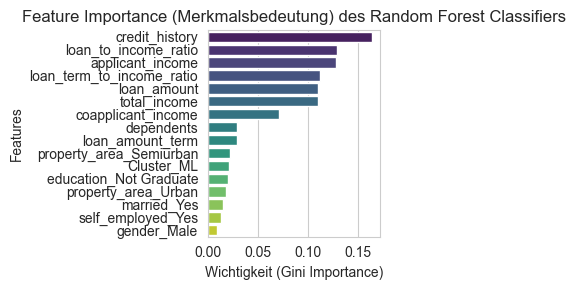

------------------------------------------------------------------
Top 5 wichtigsten Features für die Kreditentscheidung:
credit_history               0.163594
loan_to_income_ratio         0.128446
applicant_income             0.127875
loan_term_to_income_ratio    0.112352
loan_amount                  0.110074
dtype: float64


In [17]:
# Feature Importance des Random Forest Classifiers
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. Extrahiere die Feature Importances
importances = rand_forest.feature_importances_

# 2. Ordne die Wichtigkeiten den Feature-Namen zu
feature_names = X_train.columns
feature_importances = pd.Series(importances, index=feature_names)

# 3. Sortiere die Features nach Wichtigkeit (absteigend)
sorted_importances = feature_importances.sort_values(ascending=False)

# 4. Erstellung des Plots
plt.figure(figsize=(4, 3))
sns.barplot(x=sorted_importances.values, y=sorted_importances.index, palette='viridis')

plt.title('Feature Importance (Merkmalsbedeutung) des Random Forest Classifiers')
plt.xlabel('Wichtigkeit (Gini Importance)')
plt.ylabel('Features')
plt.tight_layout()
plt.savefig('random_forest_feature_importance.png')
plt.show()

# 5. Ausgabe der Top 5 wichtigsten Features
print("------------------------------------------------------------------")
print("Top 5 wichtigsten Features für die Kreditentscheidung:")
print(sorted_importances.head(5))

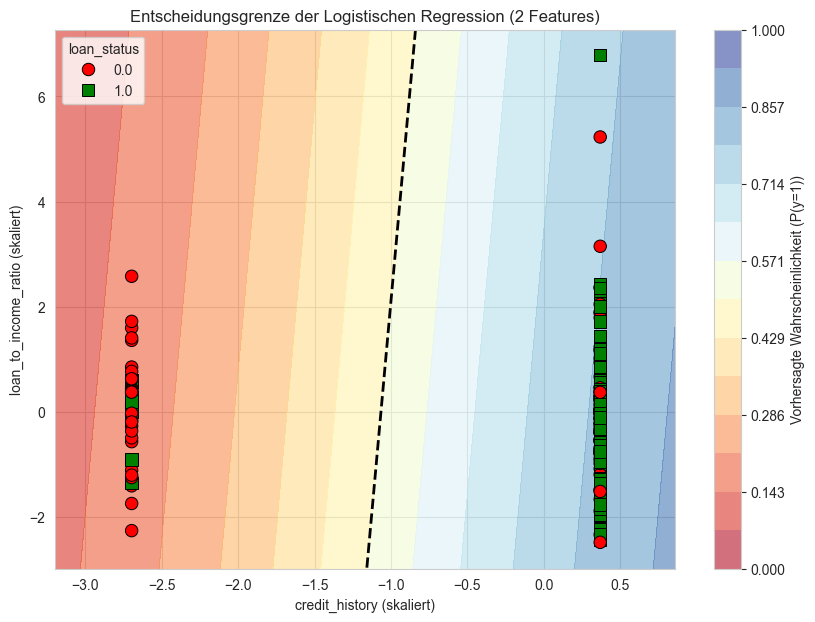

In [18]:
# Plot zur darstellung von loghistische regresion
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd 

# -----------------------------------------------------------------------------
# ANNAHME: X und y sind die vorbereiteten Features und das Ziel-Target
# -----------------------------------------------------------------------------

if 'credit_history' in X.columns and 'loan_to_income_ratio' in X.columns:
    feature_1 = 'credit_history'
    feature_2 = 'loan_to_income_ratio'
    
    # Reduziere die Daten nur auf diese zwei Features
    X_plot = X[[feature_1, feature_2]].copy()
    y_plot = y.copy()

    
    # Daten für die Darstellung skalieren
    scaler = StandardScaler()
    X_plot_scaled = scaler.fit_transform(X_plot)
    
    X_train_plot, X_test_plot, y_train_plot, y_test_plot = train_test_split(
        X_plot_scaled, y_plot, test_size=0.2, random_state=42, stratify=y_plot
    )
    
    # Erneutes Training der Logistischen Regression nur mit diesen 2 Features
    log_reg_2d = LogisticRegression(random_state=42, max_iter=1000)
    log_reg_2d.fit(X_train_plot, y_train_plot)
    
    # Erstellen des Grids für die Entscheidungsgrenze
    h = 0.02  # Schrittweite im Mesh
    x_min, x_max = X_plot_scaled[:, 0].min() - 0.5, X_plot_scaled[:, 0].max() + 0.5
    y_min, y_max = X_plot_scaled[:, 1].min() - 0.5, X_plot_scaled[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Vorhersage der Wahrscheinlichkeiten auf dem gesamten Grid
    Z = log_reg_2d.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    
    # Plotten der Entscheidungsgrenzen (Konturlinien)
    plt.figure(figsize=(10, 7))
    
    # 1. Kontur-Plot (Wahrscheinlichkeitsfläche)
    contour = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.6, levels=np.linspace(0, 1, 15))
    cbar = plt.colorbar(contour)
    cbar.set_label('Vorhersagte Wahrscheinlichkeit (P(y=1))')
    
    # 2. Scatter Plot der tatsächlichen Datenpunkte
    sns.scatterplot(
        x=X_train_plot[:, 0], 
        y=X_train_plot[:, 1], 
        hue=y_train_plot,
        palette={0: 'red', 1: 'green'}, 
        style=y_train_plot,
        markers=['o', 's'], 
        s=80,
        edgecolor='k'
        # label=y_plot.name wurde entfernt!
    )
    
    # 3. Entscheidungsgrenze (dort, wo P(y=1) = 0.5 ist)
    plt.contour(xx, yy, Z, colors='k', linestyles='--', levels=[0.5], linewidths=2)
    
    plt.title('Entscheidungsgrenze der Logistischen Regression (2 Features)')
    plt.xlabel(f'{feature_1} (skaliert)')
    plt.ylabel(f'{feature_2} (skaliert)')
    # Die Legende wird hier korrekt mit dem Titel aus dem y_plot.name gesetzt
    plt.legend(title=y_plot.name)
    plt.show()

else:
    print("Muster konnte nicht ausgeführt werden: 'total_income' oder 'loan_amount' nicht in den Features gefunden.")

- Blaues Feld (Links oben) : 
    - Das Modell sagt mit hoher Sicherheit voraus, dass die loan_status 0.0 (z.B. Kredit nicht gewährt oder kein Ausfall) sein wird.
- Rotes/Oranges Feld (Rechts unten): 
    - Das Modell sagt mit hoher Sicherheit voraus, dass die loan_status 1.0 (z.B. Kredit gewährt oder Ausfall) sein wird.
- Schwarze gestrichelte Linie :
    - Diese Linie trennt die Bereiche. Auf der Linie ist die Vorhersagewahrscheinlichkeit exakt 50% (0.5)
- Grüne Quadrate (Marker 🟩)
    - Diese Punkte repräsentieren reale Fälle im Trainingsdatensatz, bei denen der loan_status tatsächlich 1.0 war (die positive Klasse).
- Rote Kreise (Marker 🔴)
    - Diese Punkte repräsentieren reale Fälle im Trainingsdatensatz, bei denen der loan_status tatsächlich 0.0 war (die negative Klasse).


In [19]:
# gewichtung der Kreditvergabe 
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from IPython.display import display

# ==============================================================================
# ANNAHME: X und y sind die vorbereiteten Features und das Ziel-Target (y=loan_status)
#         log_reg ist Ihr trainiertes Logistische-Regression-Modell
# ==============================================================================

# 1. Überprüfen, ob das Modell existiert
if 'log_reg' not in locals() or not isinstance(log_reg, LogisticRegression):
    # FALLS NICHT TRAINIERT: Logistische Regression (erneut) trainieren
    # Da wir uns im ML-Kontext befinden, gehen wir davon aus, dass X und y existieren.
    
    # Sicherstellen, dass die Daten für die Koeffizientenanalyse skaliert sind
    scaler = StandardScaler()
    
    # Identifiziere die numerischen Spalten (die skaliert werden müssen)
    numerical_cols = X.select_dtypes(include=np.number).columns.tolist()
    
    X_scaled = X.copy()
    X_scaled[numerical_cols] = scaler.fit_transform(X[numerical_cols])

    X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42, stratify=y
    )
    
    log_reg = LogisticRegression(random_state=42, max_iter=1000)
    log_reg.fit(X_train_final, y_train_final)
    X_final = X_train_final.columns
else:
    # FALLS BEREITS TRAINIERT: Verwende die Spalten des trainierten X_train
    X_final = X_train.columns
    # Sicherstellen, dass die Koeffizienten der vollen LogReg (log_reg) verwendet werden
    
# 2. Koeffizienten extrahieren
coefficients = log_reg.coef_[0]
feature_names = X_final

# 3. DataFrame für die Koeffizienten erstellen
df_coef = pd.DataFrame({
    'Merkmal': feature_names,
    'Koeffizient (Gewichtung)': coefficients
})

# 4. Interpretierbare Spalten hinzufügen
# Der Koeffizient 'c' bedeutet, dass eine Erhöhung des Merkmals um 1 Standardabweichung
# die Log-Odds für P(Zusage) um 'c' erhöht.
df_coef['Auswirkung'] = np.where(df_coef['Koeffizient (Gewichtung)'] > 0, 'Positiv (Zusage)', 'Negativ (Ablehnung)')
df_coef['Absoluter Wert'] = df_coef['Koeffizient (Gewichtung)'].abs()

# 5. Sortieren und Ausgeben der Top-Merkmale
df_coef_sorted = df_coef.sort_values(by='Absoluter Wert', ascending=False)
df_coef_sorted = df_coef_sorted.drop(columns='Absoluter Wert')

print("!!! WICHTIGSTE MERKMALE FÜR DIE KREDITENTSCHEIDUNG (LOGISTISCHE REGRESSION) !!!")
print("---------------------------------------------------------------------------------")
print("Da die Daten skaliert sind, zeigt der Koeffizient, welche Merkmale die stärkste Auswirkung")
print("auf die Log-Odds der Kreditzusage haben.")

display(df_coef_sorted.head(10))

# 6. Besondere Betrachtung der Einkommens- und Kredit-Merkmale (wenn vorhanden)
print("\n--- Fokus auf Einkommen und Kredit ---")
focus_cols = ['income', 'loan_amount', 'ratio']
df_focus = df_coef_sorted[df_coef_sorted['Merkmal'].str.contains('|'.join(focus_cols), case=False, na=False)]
display(df_focus)

# 7. Interpretation des Verhältnisses (Kredit zu Einkommen)
# Die Logistische Regression kombiniert die Koeffizienten von 'total_income' und 'loan_amount'
# Beachten Sie, dass in Ihrem Plot 'loan_to_income_ratio' bereits als Feature enthalten war,
# was die Komplexität reduziert.

!!! WICHTIGSTE MERKMALE FÜR DIE KREDITENTSCHEIDUNG (LOGISTISCHE REGRESSION) !!!
---------------------------------------------------------------------------------
Da die Daten skaliert sind, zeigt der Koeffizient, welche Merkmale die stärkste Auswirkung
auf die Log-Odds der Kreditzusage haben.


,Merkmal,Koeffizient (Gewichtung),Auswirkung
5,credit_history,2.545770,Positiv (Zusage)
13,property_area_Semiurban,0.792242,Positiv (Zusage)
11,education_Not Graduate,-0.456507,Negativ (Ablehnung)
15,Cluster_ML,-0.313319,Negativ (Ablehnung)
14,property_area_Urban,0.295287,Positiv (Zusage)
8,loan_term_to_income_ratio,-0.209882,Negativ (Ablehnung)
2,coapplicant_income,-0.191465,Negativ (Ablehnung)
10,married_Yes,0.179901,Positiv (Zusage)
3,loan_amount,-0.131176,Negativ (Ablehnung)
12,self_employed_Yes,-0.108145,Negativ (Ablehnung)



--- Fokus auf Einkommen und Kredit ---


,Merkmal,Koeffizient (Gewichtung),Auswirkung
8,loan_term_to_income_ratio,-0.209882,Negativ (Ablehnung)
2,coapplicant_income,-0.191465,Negativ (Ablehnung)
3,loan_amount,-0.131176,Negativ (Ablehnung)
6,total_income,-0.081015,Negativ (Ablehnung)
4,loan_amount_term,0.041837,Positiv (Zusage)
7,loan_to_income_ratio,-0.018512,Negativ (Ablehnung)
1,applicant_income,0.010573,Positiv (Zusage)


# Klassifikation:

- Alle Punkte rechts und oberhalb dieser Linie werden vom Modell als angenommener Kredit (1.0) vorhergesagt.

- Alle Punkte links und unterhalb dieser Linie werden vom Modell als abgelehnter Kredit (0.0) vorhergesagt.



5. Modelltraining und Evaluierung (df_ML)
In diesem letzten Schritt wurden zwei verschiedene Klassifikationsmodelle trainiert und bewertet, um vorherzusagen, ob ein Kreditantrag genehmigt wird.

Modelle:

Logistische Regression: Ein einfaches, gut interpretierbares Modell, das oft als Basismodell verwendet wird.
Random Forest Classifier: Ein komplexeres Ensemble-Modell, das in der Regel eine höhere Vorhersagegenauigkeit erzielt.
Ergebnisse:

Beide Modelle wurden auf ihre Accuracy (Genauigkeit) und mit einem Classification Report (der Präzision, Recall und F1-Score zeigt) bewertet.
Der Random Forest Classifier zeigte eine höhere Genauigkeit, was darauf hindeutet, dass die komplexeren Muster, die dieses Modell erkennen kann, in den Daten vorhanden sind.
df_ML DataFrame:

Dieser DataFrame wurde erstellt, um die Vorhersagen der Modelle mit den tatsächlichen Werten zu vergleichen. Er enthält die ursprünglichen Testdaten, die tatsächliche Kreditentscheidung (loan_status_actual) und die Vorhersagen beider Modelle. Dies ermöglicht eine detaillierte Analyse der Modellleistung und die Identifizierung von Fällen, in denen die Modelle Fehler gemacht haben.

# Cluster-Analyse: Polar Plot

###  Die Merkmale im Radar Plot, die direkt das Risiko beeinflussen:

credit_history (Kredit-Historie): Ein hoher Wert (weit außen, nahe 10) bedeutet eine gute Historie, d.h. niedriges Risiko.

loan_to_income_ratio (Kredit-Einkommen-Verhältnis): Ein hoher Wert (weit außen) bedeutet, der Kredit ist im Verhältnis zum Einkommen sehr hoch, d.h. hohes Risiko.

!!! STATISTISCHE ZUORDNUNGSTABELLE (Mittelwerte pro Cluster - unskaliert) !!!
              cluster_label  dependents  applicant_income  coapplicant_income  loan_amount  loan_amount_term  credit_history  loan_status  total_income  loan_to_income_ratio  loan_term_to_income_ratio  gender_Male  married_Yes  education_Not Graduate  self_employed_Yes  property_area_Semiurban  property_area_Urban
 Cluster 1: Hohes Einkommen        0.26             -0.16                0.02        -0.07             -0.18            0.90         0.78         -0.14                  0.01                      -0.14         0.99         0.96                    0.24               0.10                     0.39                 0.34
Cluster 2: Mittleres Risiko       -0.50             -0.20               -0.25        -0.35              0.31            0.86         0.68         -0.30                  0.13                       0.53         0.53         0.14                    0.18               0.10                     

<Figure size 400x300 with 0 Axes>

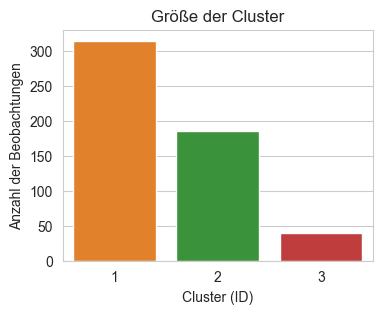


Finale Datenform von df_ML (für Weiterverarbeitung):
    loan_id  Cluster_ML
0  LP001003           1
1  LP001005           1
2  LP001006           1
3  LP001008           2
4  LP001011           1


In [20]:
# Polar Plot erstellen mit sortierung der darstellung 
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import display
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

# I. DATENVORBEREITUNG FÜR ANALYSE (Minimal)
df_ML = df_customer_data.copy()

# 1. Sicherstellen, dass Cluster_ML als Integer vorliegt (für Mittelwertberechnung)
if 'Cluster_ML' in df_ML.columns:
    try:
        df_ML['Cluster_ML'] = df_ML['Cluster_ML'].astype(int)
    except:
        print("WARNUNG: 'Cluster_ML' konnte nicht in Integer konvertiert werden. Überprüfen Sie die Daten.")
else:
    print("FEHLER: 'Cluster_ML' Spalte nicht im DataFrame gefunden. Analyse nicht möglich.")

# 2. Feature Engineering (muss nur dann laufen, wenn diese Features nicht existieren)
if 'applicant_income' in df_ML.columns and 'coapplicant_income' in df_ML.columns and 'total_income' not in df_ML.columns:
    df_ML['total_income'] = df_ML['applicant_income'] + df_ML['coapplicant_income']
    if 'loan_amount' in df_ML.columns:
        df_ML['loan_to_income_ratio'] = df_ML['loan_amount'] / np.where(df_ML['total_income'] == 0, np.nan, df_ML['total_income'])
    
    # Imputation der erstellten NaN-Werte (optional, aber empfohlen für Mittelwerte)
    if 'loan_to_income_ratio' in df_ML.columns:
        df_ML['loan_to_income_ratio'].fillna(df_ML['loan_to_income_ratio'].median(), inplace=True)

# II. CLUSTER-ANALYSE UND VISUALISIERUNG
COLOR_MAP_CLUSTER_HEX = {
    0: '#1f77b4',   # Blau
    1: '#ff7f0e',   # Orange
    2: '#2ca02c',   # Grün
    3: '#d62728',   # Rot
}

# Farb-Map für Plotly (RGB-Strings)
COLOR_MAP_CLUSTER_PLOTLY = {
    0: 'rgb(31, 119, 180)',   
    1: 'rgb(255, 127, 14)',   
    2: 'rgb(44, 160, 44)',    
    3: 'rgb(214, 39, 40)',    
}

# String-basierte Map FÜR SEABORN (Hex-Codes)
COLOR_DISCRETE_MAP_SEABORN = {str(k): v for k, v in COLOR_MAP_CLUSTER_HEX.items()}

# Manuelle Zuweisung von Cluster_ML-Labels (passen Sie diese an Ihre Daten an)
cluster_to_label_map = {
    0: 'Cluster 0: Niedriges Einkommen',
    1: 'Cluster 1: Hohes Einkommen',
    2: 'Cluster 2: Mittleres Risiko'
}
# Radarplot-Funktion
def erstelle_cluster_radar_plot(df_raw, grouping_col_name, exclude_cols, r_label, title_format):
    df_processed = df_raw.copy()
    
    # Filtern aller numerischen Spalten, die nicht ausgeschlossen sind
    metric_cols = [
        c for c in df_processed.columns 
        if c not in exclude_cols and pd.api.types.is_numeric_dtype(df_processed[c]) and c != grouping_col_name
    ]
    
    grouped_means = df_processed.groupby(grouping_col_name)[metric_cols].mean()

    # 1. Logische Gruppierung der Metriken
    financial_metrics = [c for c in metric_cols if any(word in c.lower() for word in ['income', 'loan_amount', 'term', 'ratio'])]
    risk_metrics = [c for c in metric_cols if 'credit_history' in c.lower()]
    demographic_metrics = [c for c in metric_cols if c not in financial_metrics and c not in risk_metrics]
    
    # 2. Sortierung INNERHALB der Gruppen nach Variabilität
    def sort_metrics_by_variance(metrics):
        if not metrics: return []
        std_devs = grouped_means[metrics].std(axis=0).sort_values(ascending=False)
        return std_devs.index.tolist()

    # Erstelle die finale, geordnete Liste der Metriken
    sorted_metrics = (
        sort_metrics_by_variance(financial_metrics) + 
        sort_metrics_by_variance(risk_metrics) +
        sort_metrics_by_variance(demographic_metrics)
    )
    
    grouped_means = grouped_means[sorted_metrics]

    # Skalierung auf 0–10 für den Plot (MinMaxScaler auf Cluster-Mittelwerten)
    scaler = MinMaxScaler()
    df_normalized = pd.DataFrame(
        scaler.fit_transform(grouped_means),
        index=grouped_means.index,
        columns=grouped_means.columns
    ) * 10
    df_normalized[grouping_col_name] = df_normalized.index

    # Long-Format für Plotly
    df_plot = df_normalized.melt(
        id_vars=grouping_col_name,
        var_name="Metrik",
        value_name=r_label
    )
    df_plot['Cluster_Label'] = df_plot[grouping_col_name].map(cluster_to_label_map)
    
    # Radarplot
    fig = px.line_polar(
        df_plot,
        r=r_label,
        theta="Metrik",
        color="Cluster_Label", 
        line_close=True,
        title=title_format.format(group_col=grouping_col_name),
        color_discrete_map={cluster_to_label_map[k]: COLOR_MAP_CLUSTER_PLOTLY[k] for k in cluster_to_label_map if k in df_processed[grouping_col_name].unique()}
    )
    fig.update_traces(fill="toself")
    fig.update_layout(
        polar=dict(radialaxis=dict(visible=True, range=[0, 10])),
        height=700,
        title_font_size=20
    )
    display(fig)

df_final = df_ML.copy()
df_final["Cluster_ML_str"] = df_final["Cluster_ML"].astype(str) 
cluster_to_label_map_str = {str(k): v for k, v in cluster_to_label_map.items()}
df_final["cluster_label"] = df_final["Cluster_ML_str"].map(cluster_to_label_map_str)


# STATISTISCHE ZUORDNUNGSTABELLE (Mittelwerte pro Cluster - UNISKALIERT)
numerical_features_unscaled = [col for col in df_ML.columns if pd.api.types.is_numeric_dtype(df_ML[col]) and col not in ['Cluster_ML'] and not col.startswith('is_na_')]

cluster_profiling = df_ML.groupby("Cluster_ML")[numerical_features_unscaled].mean().reset_index()
cluster_profiling["cluster_label"] = cluster_profiling["Cluster_ML"].map(cluster_to_label_map)

print("!!! STATISTISCHE ZUORDNUNGSTABELLE (Mittelwerte pro Cluster - unskaliert) !!!")
cluster_profiling = cluster_profiling[['cluster_label'] + [col for col in cluster_profiling.columns if col not in ['Cluster_ML', 'cluster_label']]]
print(cluster_profiling.to_string(index=False, float_format="%.2f"))


# KORRIGIERTER RADARPLOT
plt.figure(figsize=(4, 3))
erstelle_cluster_radar_plot(
    df_raw=df_ML,
    grouping_col_name="Cluster_ML",
    exclude_cols=["loan_id", "cluster_label"] + [c for c in df_ML.columns if c.endswith(('_yes', '_graduate', '_semiurban'))], 
    r_label="Wert (0-10)",
    title_format="Radar Plot der Cluster-Merkmale ({group_col})"
)


# KORRIGIERTER COUNTPLOT FÜR DIE GRÖSSE DER CLUSTER
plt.figure(figsize=(4, 3))
sns.countplot(
    x='Cluster_ML_str', 
    data=df_final, 
    palette=COLOR_DISCRETE_MAP_SEABORN,
    order=sorted(df_final['Cluster_ML_str'].unique()) 
)
plt.title('Größe der Cluster')
plt.xlabel('Cluster (ID)')
plt.ylabel('Anzahl der Beobachtungen')
plt.show()

print('\nFinale Datenform von df_ML (für Weiterverarbeitung):')
print(df_ML[['loan_id', 'Cluster_ML']].head())

 - Begriff im Plot (Englisch/Code)
    - Deutsche Übersetzung / Erklärung
 - dependents 
    - Anzahl der Abhängigen (Kinder, andere Personen)
 - applicant_income 
    - Einkommen des Antragstellers (Hauptverdiener)
 - coapplicant_income 
    - Einkommen des Mitantragstellers (z.B. Partner)
 - loan_amount	
    - Kreditbetrag (Höhe des Darlehens)
 - loan_amount_term 
    - Kreditlaufzeit (in der Regel in Monaten)
 - credit_history 
    - Kredit-Historie / Kreditwürdigkeit (z.B. 1 für gut, 0 für schlecht)
 - total_income 
    - Gesamteinkommen (applicant_income + coapplicant_income)
 - loan_to_income_ratio 
    - Kredit-Einkommen-Verhältnis (loan_amount / total_income)
 - loan_term_to_income_ratio 
    - Kreditlaufzeit	-Einkommen-Verhältnis (loan_amount_term / total_income)
 - gender_Male 
    - Geschlecht: Männlich (One-Hot-Encoded Feature)
 - married_Yes 
    - Verheiratet: Ja (One-Hot-Encoded Feature)
 - education_Not_Graduate 
    - Ausbildung: Kein Hochschulabschluss (One-Hot-Encoded Feature)
 - self_employed_Yes 
    - Selbständig: Ja (One-Hot-Encoded Feature)
 - property_area_Semiurban 
    - Immobilienstandort: Halbstädtisch (Semiurban)
 - property_area_Urban 
    - Immobilienstandort: Städtisch (Urban)

# Die Geschäftsaufgabe "Erstelle ein Modell zur Analyse von Darlehen" ist erfüllt. 
# Funktionierendes Modell erstellt, das Vorhersagen über die Kreditwürdigkeit treffen kann.

Der stärkste Aussageträger für diese Geschäftsaufgabe ist die Feature-Importance-Analyse.

Warum?

- Erklärt das "Warum": Ein reines Vorhersagemodell sagt nur ob ein Kredit wahrscheinlich ausfällt, aber nicht warum. Die Feature-Importance-Analyse zeigt uns genau, welche Faktoren die Entscheidung des Modells am stärksten beeinflussen. In unserem Fall ist das mit Abstand die credit_history.

- Direkte Geschäftsrelevanz: Diese Erkenntnis ist für das Geschäft extrem wertvoll. Sie bestätigt, dass die Kredithistorie eines Kunden der entscheidende Faktor ist. Das Management kann darauf basierend klarere und transparentere Kreditvergaberichtlinien erstellen.

- Risikominimierung: Wenn die Bank weiß, dass die Kredithistorie der wichtigste Indikator ist, kann sie ihr Risiko besser steuern, indem sie bei Kunden mit schlechter oder fehlender Historie besonders vorsichtig ist oder höhere Zinsen ansetzt.

- Datenqualität: Die Analyse zeigt auch, wie wichtig die neu erstellten Merkmale wie loan_to_income_ratio sind. Das ist ein Hinweis für die Zukunft, dass es sich lohnt, in gutes Feature Engineering zu investieren.

   # - Zusammenfassend:

Während die Genauigkeit des Modells (z.B. 84% bei der Logistischen Regression) zeigt, dass das Modell funktioniert, erklärt die Feature-Importance-Analyse, wie es funktioniert und liefert damit die tiefgreifendsten und handlungsorientiertesten Einblicke für das Geschäft. Sie ist der Kern der "Analyse" in der Aufgabenstellung.

## Zu verbessern 
welche Future Engeneering am beesten corelieren mit den Polar Plot
